In [1]:
# author: J. Linczuk

import settings
import processData
import heider_bib
import datanetwork
import basic_functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import networkx as nx
import scipy.stats as stats
import seaborn as sns
import net_func
import random

import autoreload
%load_ext autoreload
%autoreload 1
%aimport heider_bib

%load_ext autoreload
%autoreload 1
%aimport net_func

nowanazwa="v2"

ModuleNotFoundError: No module named 'settings'

In [2]:
%reload_ext autoreload

In [3]:
survey_df, sms_call_df, communication_time_graphs = processData.processData()

Loading communication data...test2
Fixing data format...
Shape of sms-call data: (478879, 6)
Dropping instances where sender and receiver match...
Shape of sms-call data: (478384, 6)
             DateTime  ParticipantID  SenderID  ReceiverID  EventType  \
0 2011-08-15 20:03:31          20905     20905       13116          0   
1 2011-08-15 20:03:37          13116     20905       13116          0   
2 2011-08-15 20:47:40          75178     75178       30952          0   
3 2011-08-15 20:47:50          30952     75178       30952          0   
4 2011-08-15 20:48:52          75178     75178       60830          0   

   EventLength  
0           15  
1            0  
2           39  
3           23  
4           14  

Loading survey data...
Fixing data format...
Shape of survey dataframe (204, 1559)
   egoid completed_6  duplicate _merge_6  lastpageseen_6 startlanguage_6  \
0  97900         NaT        NaN      NaN             NaN             NaN   
1  92782         NaT        NaN      NaN

/home/joanna/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


Before:


/home/joanna/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/joanna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s



Extracting corresponding communication network...
Number of interactions amongst selected users: 170468
Interactions date range: 2011-08-15 20:47:40 - 2014-08-22 00:23:55

Building network...
Study period: 1
Making network from: 2011-08-15 20:47:40 to 2012-01-28 12:19:54
Range: >= 2011-08-15 00:00:00 and < 2012-01-28 00:00:00
Number of interactions: 33547

Study period: 2
Making network from: 2012-01-28 12:19:54 to 2012-05-09 09:10:55
Range: >= 2012-01-28 00:00:00 and < 2012-05-09 00:00:00
Number of interactions: 26157

Study period: 3
Making network from: 2012-05-09 09:10:55 to 2012-08-20 10:16:29
Range: >= 2012-05-09 00:00:00 and < 2012-08-20 00:00:00
Number of interactions: 11232

Study period: 4
Making network from: 2012-08-20 10:16:29 to 2013-01-18 21:25:53
Range: >= 2012-08-20 00:00:00 and < 2013-01-18 00:00:00
Number of interactions: 33609

Study period: 5
Making network from: 2013-01-18 21:25:53 to 2013-05-02 09:01:05
Range: >= 2013-01-18 00:00:00 and < 2013-05-02 00:00:00
Num

In [4]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
# rzutuje -1 -> 0, 1->1, 0->2
def rzutowanie_na_01(i):
    return rzutowanie_na_01.tabela[i+1]

rzutowanie_na_01.tabela=[0,2,1]




In [6]:
# def plot_expected_vs_data(name, coto, expected=[], data=[],  expected_sum=[], data_sum=[]  ):
#     plt.plot(data,expected,'o',label='semesters')
#     plt.plot(range(0,int(max(data_sum))),range(0,int(max(data_sum))))
#     plt.plot(data_sum,expected_sum,'s',label='agregate')
#     plt.xlabel(coto+'_real')
#     plt.ylabel(coto+'_expected')
#     plt.legend()
#     plt.savefig(settings.figure_folder+name,dpi=600,bbox_inches='tight')

#     fig = plt.figure(figsize=(6,4))
#     plt.plot(expected,[data[x]-expected[x] for x in range(0,len(expected))],'o',label='semesters')
#     plt.plot(range(0,int(max(data_sum))),np.zeros(int(max(data_sum))))
#     plt.plot(expected_sum,[data_sum[x]-expected_sum[x] for x in range(0,len(expected_sum))],'s',label='agregate')
#     plt.xlabel(coto +'_expected')
#     plt.ylabel(coto+'_real - ' +coto +'_expected')
#     plt.legend()
#     plt.savefig(settings.figure_folder+name+"newrep",dpi=600,bbox_inches='tight')

In [7]:
def plot_expected_vs_data_datafrme(name, coto, df  ):
    
#     fig = plt.figure(figsize=(6,4))
#     sns.scatterplot(x = 'data', y = 'expected', data = df,hue = 'op/threshold', 
#                    style ='sems', s=100 )
#     sns.lineplot(range(0,int(max(df['data']))+1),range(0,int(max(df['data']))+1), color='black')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.xlabel(coto+'_real')
#     plt.ylabel(coto+'_expected')
#     plt.savefig(settings.figure_folder+name+"colors",dpi=600,bbox_inches='tight')

    fig = plt.figure(figsize=(6,4))
    sns.scatterplot(x = 'expected', y = 'data-exp', data = df,hue = 'op/threshold', 
                   style ='sems', s=300 )
    sns.lineplot(range(0,int(max(df['data']))),np.zeros(int(max(df['data']))), color='black')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(coto +'_expected')
    plt.ylabel(coto+'_real - ' +coto +'_expected')
    plt.savefig(settings.figure_folder+name+"newrep"+"colors"+nowanazwa,dpi=600,bbox_inches='tight', format='pdf')

In [8]:
def pstw_of_balance_tr_opinion_probs(pstwa_qrs_tu):
    pstw_balance=dict()

    for topic in settings.beliefs:
        tmp=np.zeros((7,1))
        for sem in range(0,7):
            tmp[sem]=1-(6*pstwa_qrs_tu[topic][sem][0]*pstwa_qrs_tu[topic][sem][1]*pstwa_qrs_tu[topic][sem][2])
        pstw_balance[topic]=tmp
    return pstw_balance


def triads_number_from_opinion_probs(pstw_balance_tu):
    df_n = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','all_triad','divided_expected'])
    df_n = df_n.fillna(0)

    for topic in settings.beliefs:
        triads=heider_bib.triangles_lifetime(communication_time_graphs,topic,[2,3,4,5,6])
        for sem in range(1,7):
            expected=((triads != 0).sum()[sem]*pstw_balance_tu[topic][sem][0])
            real=(triads == 1).sum()[sem] 
            all_triads=(triads != 0).sum()[sem] 
            df_n = df_n.append({'expected':expected,'data':float(real),'sems':sem,
                                'op/threshold':topic,'data-exp':real-expected,'all_triad':all_triads, 
                               'divided_expected':expected/all_triads},
                               ignore_index = True)
        expected=(triads != 0).sum().sum()*pstw_balance_tu[topic][0][0]
        real=(triads == 1).sum().sum()
        all_triads=(triads != 0).sum().sum()
        df_n = df_n.append({'expected':expected,'data':float(real),'sems':'all','op/threshold':topic,'data-exp':real-expected,'all_triad':all_triads, 
                               'divided_expected':expected/all_triads}, ignore_index = True)
    return df_n


def triads_number_for_real():
    df_n = pd.DataFrame(columns=['data','sems','op/threshold','all_triad','divided_real'])
    df_n = df_n.fillna(0)

    for topic in settings.beliefs:
        triads=heider_bib.triangles_lifetime(communication_time_graphs,topic,[2,3,4,5,6])
        for sem in range(1,7):
            real=(triads == 1).sum()[sem] 
            all_triads=(triads != 0).sum()[sem] 
            df_n = df_n.append({'data':float(real),'sems':sem,
                                'op/threshold':topic,'all_triad':all_triads, 
                               'divided_real':real/all_triads},
                               ignore_index = True)
        real=(triads == 1).sum().sum()
        all_triads=(triads != 0).sum().sum()
        df_n = df_n.append({'data':float(real),'sems':'all',
                                'op/threshold':topic,'all_triad':all_triads, 
                               'divided_real':real/all_triads}, ignore_index = True)
    return df_n


In [9]:





def plot_only_mean(name, coto,df_real, df_expected,zmienna,xlim=(0,1)):
    df_tmp = pd.DataFrame(columns=['op/threshold','divided_expected','de_std','divided_real', 'dr_std',
                                   'div_r-div_e','dr-de_std'])
    df_tmp = df_tmp.fillna(0)
    
    
    if(zmienna=='treshold'):
        iteruj_po=[str(x/8)+'_' for x in range(0,9)]
    elif(zmienna=='topic'):
        iteruj_po=settings.beliefs
        
    for optres in iteruj_po:
        real=   df_real.loc[(df_real['op/threshold'] == optres) & 
                        (df_real['sems'] !='all')]['divided_real'].mean()
        std_real=   df_real.loc[(df_real['op/threshold'] == optres) & 
                        (df_real['sems'] !='all')]['divided_real'].std() /6**0.5
        
        expected = df_expected.loc[(df_expected['op/threshold'] == optres) & 
                        (df_expected['sems'] !='all')]['divided_expected'].mean() 
        std_expected = df_expected.loc[(df_expected['op/threshold'] == optres) & 
                        (df_expected['sems'] !='all')]['divided_expected'].std() /6**0.5
        std_real_minus_expected=(std_real**2+std_expected**2)**0.5/6**0.5
        
        df_tmp = df_tmp.append({'op/threshold':optres,'divided_expected':expected,'divided_real':real,
                               'div_r-div_e':real-expected,'de_std':std_expected,'dr_std':std_real,'dr-de_std':std_real_minus_expected}, 
                               ignore_index = True)
    
    #sns.set()
    #sns.set_style("white")
    #fig,ax = plt.figure(figsize=(6,4))
    fig, ax = plt.subplots()

    
    groups = df_tmp.groupby('op/threshold')
    markers=["^","o","s","X","P" ,"*","D", "v"]

    if(zmienna=='treshold'):
        for name_of_group, group in groups:
            ax.plot(x=group['divided_real'], y=group['div_r-div_e'], color='blue', marker='o', linestyle='', markersize=40, label=name_of_group)
            plt.errorbar(x=group['divided_real'], y=group['div_r-div_e'],yerr=group['dr-de_std'],  color='blue', marker='o', markersize=10, label=name_of_group)
            ax.annotate(name_of_group[:-1],xy=(group['divided_real'],group['div_r-div_e']))
            #, xytext=(-40,-10), textcoords='offset points')
    elif(zmienna=='topic'):  
        i=0
        for name_of_group, group in groups:
            ax.plot(x=group['divided_real'], y=group['div_r-div_e'], marker=markers[i], markersize=10, 
                    label=name_of_group)
            plt.errorbar(x=group['divided_real'], y=group['div_r-div_e'],yerr=group['dr-de_std'], marker=markers[i],  markersize=10, label=name_of_group)
            i+=1
    #xerr=group['de_std'],
    #sns.lineplot((0,1),(0,1), color='black')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.xlabel(coto+'_real')
    #plt.ylabel(coto+'_expected')
    #plt.savefig(settings.figure_folder+name+"_mean",dpi=600,bbox_inches='tight')

    #fig = plt.figure(figsize=(6,4))
    #sns.scatterplot(x = 'divided_expected', y = 'div_r-div_e', data = df_tmp,hue = 'op/threshold',  s=100 )
    #sns.lineplot((0,1),(0,0), color='black')
    
    #plt.rcParams.update({'font.size': 40})
    plt.plot(xlim,(0,0), color='black')
    plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
    #plt.xlabel('fraction of balanced '+ coto +' in real data')
    #plt.ylabel('fraction of balanced '+ coto +' in real data \nminus fraction of expected balanced '+ coto)
    plt.savefig(settings.figure_folder+name+"error"+nowanazwa+".pdf",dpi=600,bbox_inches='tight',format='pdf')
    
    return df_tmp
    

In [10]:





def plot_only_mean_without_1(name, coto,df_real, df_expected,zmienna,xlim=(0,1)):
    df_tmp = pd.DataFrame(columns=['op/threshold','divided_expected','de_std','divided_real', 'dr_std',
                                   'div_r-div_e','dr-de_std'])
    df_tmp = df_tmp.fillna(0)
    
    
    if(zmienna=='treshold'):
        iteruj_po=[str(x/8)+'_' for x in range(0,8)]
    elif(zmienna=='topic'):
        iteruj_po=settings.beliefs
        
    for optres in iteruj_po:
        real=   df_real.loc[(df_real['op/threshold'] == optres) & 
                        (df_real['sems'] !='all')]['divided_real'].mean()
        std_real=   df_real.loc[(df_real['op/threshold'] == optres) & 
                        (df_real['sems'] !='all')]['divided_real'].std() /6**0.5
        
        expected = df_expected.loc[(df_expected['op/threshold'] == optres) & 
                        (df_expected['sems'] !='all')]['divided_expected'].mean() 
        std_expected = df_expected.loc[(df_expected['op/threshold'] == optres) & 
                        (df_expected['sems'] !='all')]['divided_expected'].std() /6**0.5
        std_real_minus_expected=(std_real**2+std_expected**2)**0.5/6**0.5
        
        df_tmp = df_tmp.append({'op/threshold':optres,'divided_expected':expected,'divided_real':real,
                               'div_r-div_e':real-expected,'de_std':std_expected,'dr_std':std_real,'dr-de_std':std_real_minus_expected}, 
                               ignore_index = True)
    
    #sns.set()
    #sns.set_style("white")
    #fig,ax = plt.figure(figsize=(6,4))
    fig, ax = plt.subplots()

    
    groups = df_tmp.groupby('op/threshold')
    markers=["^","o","s","X","P" ,"*","D", "v"]

    if(zmienna=='treshold'):
        for name_of_group, group in groups:
            ax.plot(x=group['divided_real'], y=group['div_r-div_e'], color='blue', marker='o', linestyle='', markersize=40, label=name_of_group)
            plt.errorbar(x=group['divided_real'], y=group['div_r-div_e'],yerr=group['dr-de_std'],  color='blue', marker='o', markersize=10, label=name_of_group)
            ax.annotate(name_of_group[:-1],xy=(group['divided_real'],group['div_r-div_e']))
            #, xytext=(-40,-10), textcoords='offset points')
    elif(zmienna=='topic'):  
        i=0
        for name_of_group, group in groups:
            ax.plot(x=group['divided_real'], y=group['div_r-div_e'], marker=markers[i], markersize=10, 
                    label=name_of_group)
            plt.errorbar(x=group['divided_real'], y=group['div_r-div_e'],yerr=group['dr-de_std'], marker=markers[i],  markersize=10, label=name_of_group)
            i+=1
    #xerr=group['de_std'],
    #sns.lineplot((0,1),(0,1), color='black')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.xlabel(coto+'_real')
    #plt.ylabel(coto+'_expected')
    #plt.savefig(settings.figure_folder+name+"_mean",dpi=600,bbox_inches='tight')

    #fig = plt.figure(figsize=(6,4))
    #sns.scatterplot(x = 'divided_expected', y = 'div_r-div_e', data = df_tmp,hue = 'op/threshold',  s=100 )
    #sns.lineplot((0,1),(0,0), color='black')
    
    #plt.rcParams.update({'font.size': 40})
    plt.plot(xlim,(0,0), color='black')
    plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
    #plt.xlabel('fraction of balanced '+ coto +' in real data')
    #plt.ylabel('fraction of balanced '+ coto +' in real data \nminus fraction of expected balanced '+ coto)
    plt.savefig(settings.figure_folder+name+"error"+nowanazwa+".pdf",dpi=600,bbox_inches='tight',format='pdf')
    
    return df_tmp
    

In [11]:
def wypisz_ladna_tabelke_w_latexu(ramka, dokladnosc):
    print('\\begin{table}\n'+ramka.to_latex( float_format=lambda x: dokladnosc % x)+'\caption{}\n\end{table}')


In [12]:
pstwa_qrs_OTN=dict() #OTN=only triads nodes

for topic in settings.beliefs:
    pstwa_qrs_OTN[topic]=np.zeros((7,3))
    
for sem in range(1,7):
    triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
    nodes_in_triads=set()
    for tr in triads:
        for node in tr:
            nodes_in_triads.add(node)
    for topic in settings.beliefs:
        for node in nodes_in_triads:
            pstwa_qrs_OTN[topic][sem][communication_time_graphs[sem].nodes()[node][topic]-1]+=1
            pstwa_qrs_OTN[topic][0][communication_time_graphs[sem].nodes()[node][topic]-1]+=1


for topic in settings.beliefs:
    for sem in range(0,7):
        pstwa_qrs_OTN[topic][sem]/=pstwa_qrs_OTN[topic][sem].sum()
        
pstw_balance_OTN=pstw_of_balance_tr_opinion_probs(pstwa_qrs_OTN)

df_n_OTN=triads_number_from_opinion_probs(pstw_balance_OTN)



In [13]:
import pickle
with open('pikle/'+ "pstwa_qrs_OTN" + '.pkl', 'wb') as f:
        pickle.dump(pstwa_qrs_OTN, f, pickle.HIGHEST_PROTOCOL)

In [14]:
pstwa_qrs_OTN

{'premaritalsex_': array([[0.45408163, 0.06632653, 0.47959184],
        [0.34883721, 0.11627907, 0.53488372],
        [0.48648649, 0.02702703, 0.48648649],
        [0.5       , 0.04545455, 0.45454545],
        [0.51219512, 0.07317073, 0.41463415],
        [0.5       , 0.06666667, 0.43333333],
        [0.39130435, 0.04347826, 0.56521739]]),
 'euthanasia_': array([[0.35714286, 0.20918367, 0.43367347],
        [0.25581395, 0.23255814, 0.51162791],
        [0.35135135, 0.16216216, 0.48648649],
        [0.40909091, 0.22727273, 0.36363636],
        [0.43902439, 0.19512195, 0.36585366],
        [0.36666667, 0.23333333, 0.4       ],
        [0.34782609, 0.2173913 , 0.43478261]]),
 'deathpen_': array([[0.65306122, 0.17857143, 0.16836735],
        [0.60465116, 0.18604651, 0.20930233],
        [0.67567568, 0.16216216, 0.16216216],
        [0.72727273, 0.13636364, 0.13636364],
        [0.56097561, 0.26829268, 0.17073171],
        [0.66666667, 0.16666667, 0.16666667],
        [0.7826087 , 0.0869565

premaritalsex_
euthanasia_
deathpen_
gaymarriage_
marijuana_
political_
abortion_
homosexual_


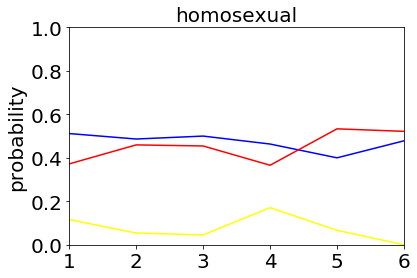

In [15]:
for opinion in settings.beliefs: 
    plt.clf()
    plt.plot([1,2,3,4,5,6],pstwa_qrs_OTN[opinion][1:][:,2], label="q (+)", color="blue")
    plt.plot([1,2,3,4,5,6],pstwa_qrs_OTN[opinion][1:][:,1], label="r (0)", color="yellow")
    plt.plot([1,2,3,4,5,6],pstwa_qrs_OTN[opinion][1:][:,0], label="s (-)", color="red")
    #plt.legend(handletextpad=0.1, labelspacing=0.1, loc='upper right', bbox_to_anchor=(1.45, 0.7))
    plt.xlim(1,6)
    plt.ylim(0.0,1.0)
    #plt.xlabel("term")
    plt.ylabel("probability")
    plt.title(opinion[:-1])
    print(opinion)
    plt.savefig(settings.figure_folder+"qrs_"+opinion[:-1]+"_"+nowanazwa+".png",dpi=600,bbox_inches='tight', format='png')

In [16]:
pstwa_qrs_OTN["homosexual_"][1:][:,0]

array([0.37209302, 0.45945946, 0.45454545, 0.36585366, 0.53333333,
       0.52173913])

In [17]:
pstwa_qrs_OTN["homosexual_"]

array([[0.43877551, 0.08673469, 0.4744898 ],
       [0.37209302, 0.11627907, 0.51162791],
       [0.45945946, 0.05405405, 0.48648649],
       [0.45454545, 0.04545455, 0.5       ],
       [0.36585366, 0.17073171, 0.46341463],
       [0.53333333, 0.06666667, 0.4       ],
       [0.52173913, 0.        , 0.47826087]])

In [18]:
pstw_balance_OTN

{'premaritalsex_': array([[0.9133349 ],
        [0.86982278],
        [0.96162123],
        [0.93801653],
        [0.90676282],
        [0.91333333],
        [0.94230295]]), 'euthanasia_': array([[0.80560555],
        [0.81737457],
        [0.83369198],
        [0.797145  ],
        [0.81195862],
        [0.79466667],
        [0.80274513]]), 'deathpen_': array([[0.88219194],
        [0.85872942],
        [0.8933923 ],
        [0.918858  ],
        [0.84582348],
        [0.88888889],
        [0.94674119]]), 'gaymarriage_': array([[0.82268389],
        [0.83729734],
        [0.83795629],
        [0.84785875],
        [0.81901017],
        [0.792     ],
        [0.8461412 ]]), 'marijuana_': array([[0.83531256],
        [0.82937351],
        [0.83369198],
        [1.        ],
        [0.77931255],
        [0.88      ],
        [0.94230295]]), 'political_': array([[0.82255002],
        [0.80982807],
        [0.82942767],
        [0.81404959],
        [0.8495669 ],
        [0.84133333],
   

In [19]:
#  df_real_triads=triads_number_for_real()

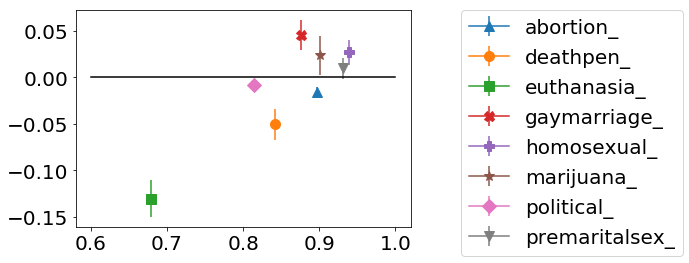

In [20]:
df_real_triads=triads_number_for_real()
df_n_OTN_means=plot_only_mean('ne_vs_nb_opinion_OTN', 'triads',df_real_triads, df_n_OTN,'topic',(0.6,1))

In [21]:
df_n_OTN_means

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,premaritalsex_,0.921977,0.013252,0.931766,0.023662,0.009790,0.011072
1,euthanasia_,0.809597,0.005976,0.678775,0.048515,-0.130822,0.019956
2,deathpen_,0.892072,0.015241,0.841595,0.037800,-0.050477,0.016639
3,gaymarriage_,0.830044,0.008681,0.875997,0.038964,0.045953,0.016297
4,marijuana_,0.877447,0.033210,0.901140,0.038241,0.023693,0.020677
5,political_,0.822848,0.008648,0.814530,0.010036,-0.008318,0.005408
6,abortion_,0.912260,0.009227,0.896652,0.008591,-0.015608,0.005147
7,homosexual_,0.912282,0.024507,0.939174,0.022316,0.026891,0.013531


In [22]:
0.045953 /0.875997

0.05245794220756464

In [23]:
binom=0
sem=1
topic='marijuana_'
pstwo_zbalansowanego_trojkata= pstw_balance_OTN

def binomial_for_n_larger_nb(co,pstwo_zbalansowanego_trojkata, df_tyle_real_traids ):
    df_tmp = pd.DataFrame(columns=['op/threshold','sem','binom'])
    df_tmp = df_tmp.fillna(0)
    
    if(co=="topic"):
        list_optr=settings.beliefs
    elif(co=="threshold"):
        list_optr= [x/8 for x in range(0,9)]
    for topic in list_optr:
        for sem in range(1,7):
            binom=0
            p_tutaj=pstwo_zbalansowanego_trojkata[topic][sem]
            n_tot=int(df_tyle_real_traids[(df_tyle_real_traids['sems']==sem) &
                                          (df_tyle_real_traids['op/threshold']==topic)].all_triad)
            m=df_tyle_real_traids[(df_tyle_real_traids['sems']==sem) &
                                  (df_tyle_real_traids['op/threshold']==topic)].data

            for i in range(int(m), n_tot+1):
                binom+=stats.binom.pmf(k=i, n=n_tot, p=p_tutaj)
            binom=binom[0]
            df_tmp = df_tmp.append({'op/threshold':topic,'sem':sem,'binom':binom}, 
                               ignore_index = True)
    return df_tmp

def binomial_for_n_larger_nb__mean(co,df_means, df_tyle_real_traids ):
    
    if(co=="topic"):
        list_optr=settings.beliefs
    elif(co=="threshold"):
        list_optr= [str(x/8)+'_' for x in range(0,9)]
        
        
    pstwo_df_means={}
    pmf=dict()

    pmf_2=dict()

    for topic in list_optr:
#         print(pstwo_df_means)
#         print(df_means['op/threshold'])
#         print(df_means[df_means['op/threshold']==topic]['divided_expected'])
# w tym i tylko tym miejscu jest zastosowane pobieranie liczby przez values. Bardziej mi się podoba niż rzutowanie
#ale wszędzie indziej jest już int() więc nie zmieniam. Tutaj potrzebny float. Problem w tym, że python nie umie
#zaokrąglić dobrze 1.000000, dlatego dalej jest round
        pstwo_df_means[topic]=(df_means[df_means['op/threshold']==topic]['divided_expected']).values[0]
        pmf[topic]=list()
        pmf_2[topic]=list()


    df_tmp = pd.DataFrame(columns=['op/threshold','binom'])
    df_tmp = df_tmp.fillna(0)
    
    print(list_optr)
    for element in list_optr:
            binom=0
            p_tutaj=pstwo_df_means[element]
            n_tot=int(df_tyle_real_traids[(df_tyle_real_traids['sems']=='all') 
                                          & (df_tyle_real_traids['op/threshold']==element)].all_triad)
            m=df_tyle_real_traids[(df_tyle_real_traids['sems']=='all') 
                                  & (df_tyle_real_traids['op/threshold']==element)].data
            
            #if(int(m)!=n_tot):
            for i in range(0, n_tot+1):
                    #round bo python nie umie zaokrąglić 1.0
                    #stats_tutaj=stats.binom.pmf(k=i, n=n_tot, p=round(p_tutaj,15)) 
                    if(i>=int(m)):
                        stats_tutaj=stats.binom.pmf(k=i, n=n_tot, p=round(p_tutaj,15)) 
                        #print(round(p_tutaj,15))
                        binom+=stats_tutaj
                        pmf_2[element].append(stats_tutaj)
                    #pmf[element].append(stats_tutaj )
            df_tmp = df_tmp.append({'op/threshold':element,'binom':binom}, 
                               ignore_index = True)
            
            #print(stats.binom_test(int(m), n_tot, p_tutaj, alternative='greater'))
    return df_tmp#, pmf,pstwo_df_means, pmf_2

In [182]:
df_n_OTN_means

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,premaritalsex_,0.921977,0.013252,0.931766,0.023662,0.009790,0.011072
1,euthanasia_,0.809597,0.005976,0.678775,0.048515,-0.130822,0.019956
2,deathpen_,0.892072,0.015241,0.841595,0.037800,-0.050477,0.016639
3,gaymarriage_,0.830044,0.008681,0.875997,0.038964,0.045953,0.016297
4,marijuana_,0.877447,0.033210,0.901140,0.038241,0.023693,0.020677
5,political_,0.822848,0.008648,0.814530,0.010036,-0.008318,0.005408
6,abortion_,0.912260,0.009227,0.896652,0.008591,-0.015608,0.005147
7,homosexual_,0.912282,0.024507,0.939174,0.022316,0.026891,0.013531


In [24]:
test=binomial_for_n_larger_nb__mean('topic',df_n_OTN_means, df_real_triads)

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']


In [25]:
test=binomial_for_n_larger_nb__mean('topic',df_n_OTN_means, df_real_triads)

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']


In [26]:
# test[2]

In [27]:
# for l in test[1]:
#     print(l)
#     print(len(test[1][l]))

In [28]:
# c_list=['b','g','r','slategray','m','y','k','chocolate']
# i=0

# fig = plt.figure(figsize=(15,10))

# for topic in settings.beliefs:
#     plt.plot(test[1][topic], color=c_list[i],label=topic)
#     plt.plot(test[3][topic], color=c_list[i])
#     i+=1
# plt.legend()
    

In [29]:
# print(test[1]['abortion_'], test[1]['homosexual_'])

In [30]:
# test[3]

In [31]:
#b_triad_opinon_single_means = binomial_for_n_larger_nb__mean('topic',df_n_OTN_means, df_real_triads)

In [32]:
b_triad_opinon_single_means = binomial_for_n_larger_nb__mean('topic',df_n_OTN_means, df_real_triads)
wypisz_ladna_tabelke_w_latexu(b_triad_opinon_single_means,'%.4f')

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} &    op/threshold &  binom \\
\midrule
0 &  premaritalsex\_ & 0.3581 \\
1 &     euthanasia\_ & 0.9996 \\
2 &       deathpen\_ & 0.9966 \\
3 &    gaymarriage\_ & 0.0847 \\
4 &      marijuana\_ & 0.6697 \\
5 &      political\_ & 0.6015 \\
6 &       abortion\_ & 0.8465 \\
7 &     homosexual\_ & 0.4438 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}


In [33]:
def holmebonferoni_for_binom(binom_df):
    a=binom_df.sort_values(by=['binom'], inplace=False)
    k=1
    m=len(a['binom'])
    jakie=""
    for index, row in a.iterrows():
        HB=0.05/(m+1-k)
        if (row['binom']<HB):
            jakie="mniejsze"
        else:
            jakie="wieksze"
        print(row['op/threshold']+"   "+str(row['binom'])+"   "+str(0.05/(m+1-k))+"   "+jakie)
        k+=1


In [34]:
holmebonferoni_for_binom(b_triad_opinon_single_means)

gaymarriage_   0.08471998094578186   0.00625   wieksze
premaritalsex_   0.3581303023273861   0.0071428571428571435   wieksze
homosexual_   0.4438473144983125   0.008333333333333333   wieksze
political_   0.6015399586471292   0.01   wieksze
marijuana_   0.6696806376499482   0.0125   wieksze
abortion_   0.846505078666431   0.016666666666666666   wieksze
deathpen_   0.9965964728149633   0.025   wieksze
euthanasia_   0.9995519937461934   0.05   wieksze


In [35]:
def pstw_of_balance_tr_edge_probs(pstwa_ab_tu):
    pstw_balance_edge=dict()

    for topic in settings.beliefs:
        tmp=np.zeros((7,1))
        for sem in range(0,7):
            tmp[sem]=(pstwa_ab_tu[topic][sem][1]**3)+(3*pstwa_ab_tu[topic][sem][1]*(pstwa_ab_tu[topic][sem][0]**2))
        pstw_balance_edge[topic]=tmp
    return pstw_balance_edge


def pstw_of_balance_tr_edge_probs_v2(pstwa_ab_tu):
    pstw_balance_edge=dict()

    for topic in settings.beliefs:
        tmp=np.zeros((7,1))
        for sem in range(0,7):
            tmp[sem]=1-(pstwa_ab_tu[topic][sem][0]**3)
        pstw_balance_edge[topic]=tmp
    return pstw_balance_edge

def pstw_of_balance_tr_edge_probs_v3(pstwa_ab_tu):
    pstw_balance_edge=dict()

    for topic in settings.beliefs:
        tmp=np.zeros((7,1))
        for sem in range(0,7):
            tmp[sem]=(pstwa_ab_tu[topic][sem][1]**2)+2*pstwa_ab_tu[topic][sem][1]*pstwa_ab_tu[topic][sem][0]+pstwa_ab_tu[topic][sem][1]*pstwa_ab_tu[topic][sem][0]**2
        pstw_balance_edge[topic]=tmp
    return pstw_balance_edge


In [36]:
pstwa_ab_OTN=dict()

for topic in settings.beliefs:
    pstwa_ab_OTN[topic]=np.zeros((7,2))
    
for sem in range(1,7):
    triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
    edges_in_triads=set()
    for tr in triads:
        for i in range(0,3):
            edges_in_triads.add(net_func.uporzadkuj_pare(tr[i],tr[(i+1)%3]))
    for topic in settings.beliefs:
        for edge in edges_in_triads:
                if(communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==
                  communication_time_graphs[sem].nodes().data()[edge[1]][topic]):
                    sign=1
                else:
                    sign=0 #powinno być -1, ale wygodniej trzymac w tabelach 0
                pstwa_ab_OTN[topic][sem][sign]+=1
                pstwa_ab_OTN[topic][0][sign]+=1


for topic in settings.beliefs:
    for sem in range(0,7):
        pstwa_ab_OTN[topic][sem]/=pstwa_ab_OTN[topic][sem].sum()
        
pstw_balance_edges_OTN = pstw_of_balance_tr_edge_probs(pstwa_ab_OTN)

df_n_edges_OTN=triads_number_from_opinion_probs(pstw_balance_edges_OTN)


        
pstw_balance_edges_OTN_v2 = pstw_of_balance_tr_edge_probs_v2(pstwa_ab_OTN)

df_n_edges_OTN_v2=triads_number_from_opinion_probs(pstw_balance_edges_OTN_v2)


        
pstw_balance_edges_OTN_v3 = pstw_of_balance_tr_edge_probs_v3(pstwa_ab_OTN)

df_n_edges_OTN_v3=triads_number_from_opinion_probs(pstw_balance_edges_OTN_v3)


#plot_expected_vs_data_datafrme('ne_vs_nb_edges_OTN', 'n', df_n_edges_OTN  )

In [37]:
import pickle
with open('pikle/'+ "pstwa_ab_OTN" + '.pkl', 'wb') as f:
        pickle.dump(pstwa_ab_OTN, f, pickle.HIGHEST_PROTOCOL)

In [38]:
pstwa_ab_OTN

{'premaritalsex_': array([[0.45289855, 0.54710145],
        [0.51388889, 0.48611111],
        [0.49056604, 0.50943396],
        [0.48      , 0.52      ],
        [0.40350877, 0.59649123],
        [0.36585366, 0.63414634],
        [0.42857143, 0.57142857]]),
 'euthanasia_': array([[0.68115942, 0.31884058],
        [0.69444444, 0.30555556],
        [0.64150943, 0.35849057],
        [0.76      , 0.24      ],
        [0.68421053, 0.31578947],
        [0.70731707, 0.29268293],
        [0.60714286, 0.39285714]]),
 'deathpen_': array([[0.50724638, 0.49275362],
        [0.54166667, 0.45833333],
        [0.50943396, 0.49056604],
        [0.4       , 0.6       ],
        [0.56140351, 0.43859649],
        [0.53658537, 0.46341463],
        [0.35714286, 0.64285714]]),
 'gaymarriage_': array([[0.57971014, 0.42028986],
        [0.65277778, 0.34722222],
        [0.54716981, 0.45283019],
        [0.64      , 0.36      ],
        [0.52631579, 0.47368421],
        [0.58536585, 0.41463415],
        [0.5  

In [39]:
print(opinion)

print(pstwa_ab_OTN[opinion][1:][:,1])
print(pstwa_ab_OTN[opinion][1:][:,0])

homosexual_
[0.41666667 0.62264151 0.6        0.45614035 0.56097561 0.60714286]
[0.58333333 0.37735849 0.4        0.54385965 0.43902439 0.39285714]


premaritalsex_
euthanasia_
deathpen_
gaymarriage_
marijuana_
political_
abortion_
homosexual_


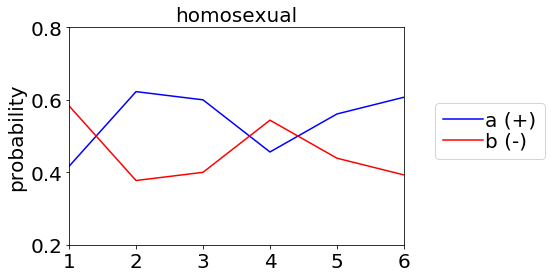

In [40]:
for opinion in settings.beliefs: 
    plt.clf()
    plt.plot([1,2,3,4,5,6],pstwa_ab_OTN[opinion][1:][:,1], label="a (+)", color="blue")
    plt.plot([1,2,3,4,5,6],pstwa_ab_OTN[opinion][1:][:,0], label="b (-)", color="red")
    plt.legend(handletextpad=0.1, labelspacing=0.1, loc='upper right', bbox_to_anchor=(1.45, 0.7))
    plt.xlim(1,6)
    plt.ylim(0.2,0.8)
    #plt.xlabel("term")
    plt.ylabel("probability")
    plt.title(opinion[:-1])
    print(opinion)
    plt.savefig(settings.figure_folder+"ab_"+opinion[:-1]+"_"+nowanazwa+".png",dpi=600,bbox_inches='tight', format='png')

In [41]:
df_n_edges_OTN_v2

,expected,data,sems,op/threshold,data-exp,all_triad,divided_expected
0,38.893109,44.0,1,premaritalsex_,5.106891,45,0.864291
1,22.930513,25.0,2,premaritalsex_,2.069487,26,0.881943
2,8.004672,9.0,3,premaritalsex_,0.995328,9,0.889408
3,24.291825,23.0,4,premaritalsex_,-1.291825,26,0.934301
4,19.020618,17.0,5,premaritalsex_,-2.020618,20,0.951031
5,11.055394,11.0,6,premaritalsex_,-0.055394,12,0.921283
6,125.180181,129.0,all,premaritalsex_,3.819819,138,0.907103
7,29.929591,30.0,1,euthanasia_,0.070409,45,0.665102
8,19.135918,19.0,2,euthanasia_,-0.135918,26,0.735997
9,5.049216,4.0,3,euthanasia_,-1.049216,9,0.561024


In [42]:
pstw_balance_edges_OTN_v2

{'premaritalsex_': array([[0.90710276],
        [0.8642913 ],
        [0.88194281],
        [0.889408  ],
        [0.93430097],
        [0.95103089],
        [0.9212828 ]]), 'euthanasia_': array([[0.68395691],
        [0.66510202],
        [0.73599683],
        [0.561024  ],
        [0.67969092],
        [0.64613108],
        [0.77619351]]), 'deathpen_': array([[0.86948607],
        [0.8410735 ],
        [0.86779019],
        [0.936     ],
        [0.82306027],
        [0.84550427],
        [0.95444606]]), 'gaymarriage_': array([[0.80518038],
        [0.7218391 ],
        [0.8361802 ],
        [0.737856  ],
        [0.85420615],
        [0.79942253],
        [0.875     ]]), 'marijuana_': array([[0.86948607],
        [0.73921896],
        [0.90714482],
        [0.978048  ],
        [0.80594839],
        [0.91538138],
        [0.9212828 ]]), 'political_': array([[0.82628596],
        [0.7218391 ],
        [0.81864223],
        [0.824384  ],
        [0.86830496],
        [0.90048026],
   

In [43]:
pstwa_abc_OTN=dict()

for topic in settings.beliefs:
    pstwa_abc_OTN[topic]=np.zeros((7,3))
    
for sem in range(1,7):
    triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
    edges_in_triads=set()
    for tr in triads:
        for i in range(0,3):
            edges_in_triads.add(net_func.uporzadkuj_pare(tr[i],tr[(i+1)%3]))
    for topic in settings.beliefs:
        for edge in edges_in_triads:
                if(communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==
                  communication_time_graphs[sem].nodes().data()[edge[1]][topic]):
                    sign=1
                elif (communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==2 or
                  communication_time_graphs[sem].nodes().data()[edge[1]][topic]==2):
                        sign=2
                else:
                    sign=0 #powinno być -1, ale wygodniej trzymac w tabelach 0
                pstwa_abc_OTN[topic][sem][sign]+=1
                pstwa_abc_OTN[topic][0][sign]+=1


for topic in settings.beliefs:
    for sem in range(0,7):
        pstwa_abc_OTN[topic][sem]/=pstwa_abc_OTN[topic][sem].sum()
        
#pstw_balance_edges_OTN = pstw_of_balance_tr_edge_probs(pstwa_ab_OTN)


pstw_balance_edge_abc=dict()

for topic in settings.beliefs:
    tmp=np.zeros((7,1))
    for sem in range(0,7):
        tmp[sem]=(1-(3*(pstwa_abc_OTN[topic][sem][0]*pstwa_abc_OTN[topic][sem][2]**2)))
    pstw_balance_edge_abc[topic]=tmp


df_n_edges_OTN_abc=triads_number_from_opinion_probs(pstw_balance_edge_abc)


#plot_expected_vs_data_datafrme('ne_vs_nb_edges_OTN', 'n', df_n_edges_OTN  )

In [44]:
# #potrojne liczenie krawedzi
# pstwa_ab_OTN_3=dict()

# for topic in settings.beliefs:
#     pstwa_ab_OTN_3[topic]=np.zeros((7,2))
    
# for sem in range(1,7):
#     triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
#     edges_in_triads=set()
#     for tr in triads:
#         for i in range(0,3):
#             edges_in_triads.add(net_func.uporzadkuj_pare(tr[i],tr[(i+1)%3]))
#             for topic in settings.beliefs:
#                 if(communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==
#                   communication_time_graphs[sem].nodes().data()[edge[1]][topic]):
#                     sign=1
#                 else:
#                     sign=0 #powinno być -1, ale wygodniej trzymac w tabelach 0
#                 pstwa_ab_OTN_3[topic][sem][sign]+=1
#                 pstwa_ab_OTN_3[topic][0][sign]+=1


# for topic in settings.beliefs:
#     for sem in range(0,7):
#         pstwa_ab_OTN_3[topic][sem]/=pstwa_ab_OTN_3[topic][sem].sum()
        
# pstw_balance_edges_OTN_3 = pstw_of_balance_tr_edge_probs(pstwa_ab_OTN_3)

# df_n_edges_OTN_3=triads_number_from_opinion_probs(pstw_balance_edges_OTN_3)

In [45]:
# pstwa_ab_OTN_0zplusem=dict()

# for topic in settings.beliefs:
#     pstwa_ab_OTN_0zplusem[topic]=np.zeros((7,2))
    
# for sem in range(1,7):
#     triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
#     edges_in_triads=set()
#     for tr in triads:
#         for i in range(0,3):
#             edges_in_triads.add(net_func.uporzadkuj_pare(tr[i],tr[(i+1)%3]))
#     for topic in settings.beliefs:
#         for edge in edges_in_triads:
#                 if(communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==
#                   communication_time_graphs[sem].nodes().data()[edge[1]][topic]):
#                     sign=1
#                 elif(communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==2 or
#                    communication_time_graphs[sem].nodes().data()[edge[1]][topic]==2):
#                     sign=1
#                 else:
#                     sign=0 #powinno być -1, ale wygodniej trzymac w tabelach 0
#                 pstwa_ab_OTN_0zplusem[topic][sem][sign]+=1
#                 pstwa_ab_OTN_0zplusem[topic][0][sign]+=1


# for topic in settings.beliefs:
#     for sem in range(0,7):
#         pstwa_ab_OTN_0zplusem[topic][sem]/=pstwa_ab_OTN_0zplusem[topic][sem].sum()
        
# pstw_balance_edges_OTN_0zplusem = pstw_of_balance_tr_edge_probs(pstwa_ab_OTN_0zplusem)

# df_n_edges_OTN_0zplusem=triads_number_from_opinion_probs(pstw_balance_edges_OTN_0zplusem)


# #plot_expected_vs_data_datafrme('ne_vs_nb_edges_OTN', 'n', df_n_edges_OTN  )

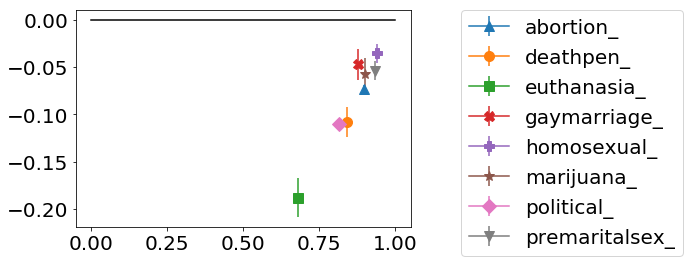

In [46]:
df_triads_edges_mean_abc=plot_only_mean('ne_vs_nb_edges_OTN_test_abc', 'triads',df_real_triads, df_n_edges_OTN_abc,'topic')

In [47]:
#df_triads_edges_mean_0zplusem=plot_only_mean('ne_vs_nb_edges_OTN_test_0zplusem', 'triads',df_real_triads, df_n_edges_OTN_0zplusem,'topic')

In [48]:
#df_triads_edges_mean_3=plot_only_mean('ne_vs_nb_edges_OTN_test_3', 'triads',df_real_triads, df_n_edges_OTN_3,'topic')

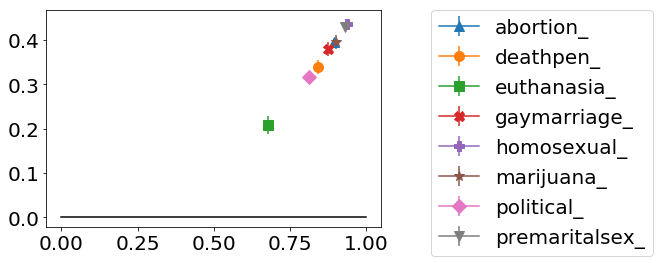

In [49]:
df_triads_edges_mean=plot_only_mean('ne_vs_nb_edges_OTN_test', 'triads',df_real_triads, df_n_edges_OTN,'topic')

In [50]:
#wypisz_ladna_tabelke_w_latexu(binomial_for_n_larger_nb__mean("topic", df_triads_edges_mean,df_real_triads ),"%.30f")

In [51]:
wypisz_ladna_tabelke_w_latexu(binomial_for_n_larger_nb__mean("topic", df_triads_edges_mean,df_real_triads ),"%.30f")

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} &    op/threshold &                            binom \\
\midrule
0 &  premaritalsex\_ & 0.000000000000000000000000000213 \\
1 &     euthanasia\_ & 0.000000074684878544648594966497 \\
2 &       deathpen\_ & 0.000000000000011130608001988838 \\
3 &    gaymarriage\_ & 0.000000000000000000002979814316 \\
4 &      marijuana\_ & 0.000000000000000000164452652247 \\
5 &      political\_ & 0.000000000000004520192360000156 \\
6 &       abortion\_ & 0.000000000000000000000198649587 \\
7 &     homosexual\_ & 0.000000000000000000000000031655 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}


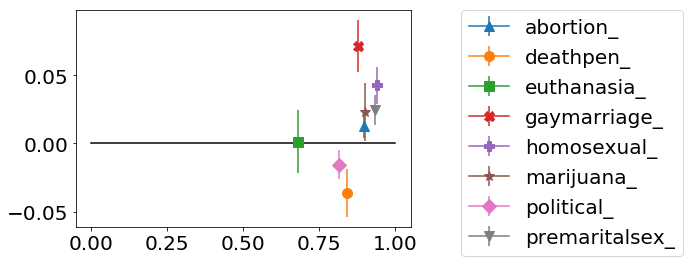

In [52]:
df_triads_edges_mean_v2=plot_only_mean('ne_vs_nb_edges_OTN_test_v2', 'triads',df_real_triads, df_n_edges_OTN_v2,'topic')

In [53]:
df_triads_edges_mean_v2

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,premaritalsex_,0.907043,0.013723,0.931766,0.023662,0.024724,0.011167
1,euthanasia_,0.677356,0.030480,0.678775,0.048515,0.001419,0.023391
2,deathpen_,0.877979,0.022174,0.841595,0.037800,-0.036384,0.017891
3,gaymarriage_,0.804084,0.025654,0.875997,0.038964,0.071913,0.019045
4,marijuana_,0.877837,0.035861,0.901140,0.038241,0.023302,0.021403
5,political_,0.829984,0.024872,0.814530,0.010036,-0.015454,0.010949
6,abortion_,0.883630,0.019867,0.896652,0.008591,0.013022,0.008836
7,homosexual_,0.896276,0.024863,0.939174,0.022316,0.042898,0.013639


In [54]:
0.071913 /0.875997

0.08209274689296882

binomial for one opinion edges

In [55]:
bin_for_E1=binomial_for_n_larger_nb__mean("topic", df_triads_edges_mean_v2,df_real_triads )
wypisz_ladna_tabelke_w_latexu(binomial_for_n_larger_nb__mean("topic", df_triads_edges_mean_v2,df_real_triads ),
                              "%.4f")

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']
['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} &    op/threshold &  binom \\
\midrule
0 &  premaritalsex\_ & 0.1646 \\
1 &     euthanasia\_ & 0.3597 \\
2 &       deathpen\_ & 0.9840 \\
3 &    gaymarriage\_ & 0.0166 \\
4 &      marijuana\_ & 0.6748 \\
5 &      political\_ & 0.6848 \\
6 &       abortion\_ & 0.4544 \\
7 &     homosexual\_ & 0.2202 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}


In [56]:
#0.05/(8+1-k)

In [57]:
holmebonferoni_for_binom(bin_for_E1)

gaymarriage_   0.016552264959089406   0.00625   wieksze
premaritalsex_   0.16459802606963045   0.0071428571428571435   wieksze
homosexual_   0.2201834578894408   0.008333333333333333   wieksze
euthanasia_   0.3597475213874868   0.01   wieksze
abortion_   0.45435644050519014   0.0125   wieksze
marijuana_   0.674824041784595   0.016666666666666666   wieksze
political_   0.6848098964903748   0.025   wieksze
deathpen_   0.9840449621416651   0.05   wieksze


In [58]:
# b_triad_edges_single_means = binomial_for_n_larger_nb__mean('topic',df_triads_edges_mean, df_real_triads)
# print(b_triad_edges_single_means.to_latex())

In [59]:
def pstw_of_balance_ee_probs(pstwa_qrs_tu):
    pstw_balance_edge_based_on_opinion=dict()

    for topic in settings.beliefs:
        tmp=np.zeros((7,1))
        for sem in range(0,7):
            tmp[sem]=(pstwa_qrs_tu[topic][sem][0]**2)+(pstwa_qrs_tu[topic][sem][1]**2)+(pstwa_qrs_tu[topic][sem][2]**2)
        pstw_balance_edge_based_on_opinion[topic]=tmp
    return pstw_balance_edge_based_on_opinion



def edge_number_from_opinion_probs( pstw_balance_edge_based_on_opinion_tu, ilosc_krawedzi_single_tu,dziel):     
    df_e_edges = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
    df_e_edges = df_e_edges.fillna(0)

    for topic in settings.beliefs:
        for sem in range(1,7):
            expected=ilosc_krawedzi_single_tu[topic][sem].sum()*pstw_balance_edge_based_on_opinion_tu[topic][sem][0]
            real=ilosc_krawedzi_single_tu[topic][sem][1] 
            div_e=expected/ilosc_krawedzi_single_tu[topic][sem].sum()
            df_e_edges = df_e_edges.append({'expected':expected,'data':float(real),'sems':sem,'op/threshold':topic,'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
        if(dziel==1):
            expected=ilosc_krawedzi_single_tu[topic][0].sum()*pstw_balance_edge_based_on_opinion_tu[topic][0][0]/6
            real=ilosc_krawedzi_single_tu[topic][0][1]/6
            div_e=expected/(ilosc_krawedzi_single_tu[topic][0].sum()/6)
        else:
            expected=ilosc_krawedzi_single_tu[topic][0].sum()*pstw_balance_edge_based_on_opinion_tu[topic][0][0]
            real=ilosc_krawedzi_single_tu[topic][0][1]
            div_e=expected/ilosc_krawedzi_single_tu[topic][0].sum()
        df_e_edges = df_e_edges.append({'expected':expected,'data':float(real),'sems':'all','op/threshold':topic,'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
    return df_e_edges

#all_triad here means all edges. It is for compability
def edge_number_for_real(ilosc_krawedzi_single_tu):     
    df_e_edges = pd.DataFrame(columns=['data','sems','op/threshold','divided_real','all_triad'])
    df_e_edges = df_e_edges.fillna(0)

    for topic in settings.beliefs:
        for sem in range(1,7):
            div_real=ilosc_krawedzi_single_tu[topic][sem][1].sum()/ilosc_krawedzi_single_tu[topic][sem].sum().sum()
            real=ilosc_krawedzi_single_tu[topic][sem][1].sum()
            df_e_edges = df_e_edges.append({'data':float(real),'sems':sem,'op/threshold':topic,'divided_real':div_real,'all_triad':ilosc_krawedzi_single_tu[topic][sem].sum().sum()}, ignore_index = True)
        div_real=ilosc_krawedzi_single_tu[topic][0][1].sum()/ilosc_krawedzi_single_tu[topic][0].sum().sum()
        real=ilosc_krawedzi_single_tu[topic][0][1].sum()
        df_e_edges = df_e_edges.append({'data':float(real),'sems':'all','op/threshold':topic,'divided_real':div_real, 'all_triad':ilosc_krawedzi_single_tu[topic][0].sum().sum()}, ignore_index = True)
    return df_e_edges


In [60]:
ilosc_krawedzi_single_OTN=dict()

for topic in settings.beliefs:
    ilosc_krawedzi_single_OTN[topic]=np.zeros((7,2))
    

for sem in range(1,7):
    triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
    edges_in_triads=set()
    for tr in triads:
        for i in range(0,3):
            edges_in_triads.add(net_func.uporzadkuj_pare(tr[i],tr[(i+1)%3]))
    for topic in settings.beliefs:
        for edge in edges_in_triads:
                if(communication_time_graphs[sem].nodes().data()[edge[0]][topic] ==
                  communication_time_graphs[sem].nodes().data()[edge[1]][topic]):
                    sign=1
                else:
                    sign=0 #powinno być -1, ale wygodniej trzymac w tabelach 0
                ilosc_krawedzi_single_OTN[topic][sem][sign]+=1
                ilosc_krawedzi_single_OTN[topic][0][sign]+=1
                


                
pstw_balance_edge_based_on_opinion_OTN=pstw_of_balance_ee_probs(pstwa_qrs_OTN)
df_e_edges_OTN=edge_number_from_opinion_probs(pstw_balance_edge_based_on_opinion_OTN, ilosc_krawedzi_single_OTN,dziel=1)

#plot_expected_vs_data_datafrme('ee_vs_eb_opinions_OTN', 'e+', df_e_edges_OTN  )            

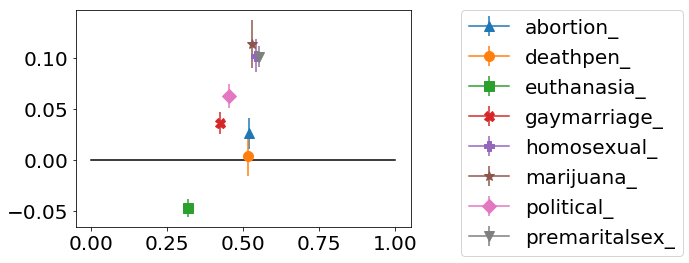

In [61]:
df_edge_number_in_real=edge_number_for_real(ilosc_krawedzi_single_OTN)
df_e_edges_OTN2=edge_number_from_opinion_probs(pstw_balance_edge_based_on_opinion_OTN, ilosc_krawedzi_single_OTN,dziel=0)

df_e_edges_OTN2_mean=plot_only_mean('ee_vs_eb_opinions_OTN', 'positive_edges',df_edge_number_in_real, df_e_edges_OTN2,'topic')

In [62]:
b_edges_opinion_single_means = binomial_for_n_larger_nb__mean('topic',df_e_edges_OTN2_mean, df_edge_number_in_real)
print('\\begin{table}\n\caption{}\n'+b_edges_opinion_single_means.to_latex()+'\end{table}')

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']
\begin{table}
\caption{}
\begin{tabular}{llr}
\toprule
{} &    op/threshold &     binom \\
\midrule
0 &  premaritalsex\_ &  0.000921 \\
1 &     euthanasia\_ &  0.952056 \\
2 &       deathpen\_ &  0.758295 \\
3 &    gaymarriage\_ &  0.153712 \\
4 &      marijuana\_ &  0.006198 \\
5 &      political\_ &  0.043648 \\
6 &       abortion\_ &  0.273219 \\
7 &     homosexual\_ &  0.004591 \\
\bottomrule
\end{tabular}
\end{table}


In [63]:
# progi= [x/8 for x in range(0,9)]
# weight={'premaritalsex_': 1,
#  'euthanasia_': 1,
#  'deathpen_': 1,
#  'gaymarriage_':1,
#  'marijuana_': 1,
#  'political_': 1,
#  'abortion_':1,
#  'homosexual_':1}

# pstwa_ab_multi=dict()
# for treshold in progi:
#     tmp=np.zeros((7,2))
#     for sem in range(1,7):
#         for edge in communication_time_graphs[sem].edges():
#             sign = heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],
#                                                               edge[0],edge[1], treshold,weight)
#             tmp[sem,rzutowanie_na_01(sign)]+=1
#             tmp[0,rzutowanie_na_01(sign)]+=1
#     pstwa_ab_multi[treshold]=tmp

# for treshold in progi:
#     for sem in range(0,7):
#         pstwa_ab_multi[treshold][sem]/=pstwa_ab_multi[treshold][sem].sum()
        
# pstw_balance_edge_multi=dict()

# for treshold in progi:
#     tmp=np.zeros((7,1))
#     for sem in range(0,7):
#         tmp[sem]=(pstwa_ab_multi[treshold][sem][1]**3)+(3*pstwa_ab_multi[treshold][sem][1]*(pstwa_ab_multi[treshold][sem][0]**2))
#     pstw_balance_edge_multi[treshold]=tmp

# df_ne_edges_multi = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
# df_ne_edges_multi = df_ne_edges_multi.fillna(0)
# for treshold in progi:
#     triads=heider_bib.multi_triangles_lifetime(communication_time_graphs,treshold,[2,3,4,5,6],
#                                                weight, heider_bib.MultiSignOfEdge_weight_ordered,
#                                               heider_bib.Mulit_info_of_triangle)[0]
#     for sem in range(1,7):
#         expected=(triads != 0).sum()[sem]*pstw_balance_edge_multi[treshold][sem][0]
#         real=(triads == 1).sum()[sem] 
#         div_e=expected/(triads != 0).sum()[sem]
#         df_ne_edges_multi = df_ne_edges_multi.append({'expected':expected,
#                                                       'data':float(real),'sems':sem,
#                                                       'op/threshold':str(treshold)+"_",'data-exp':real-expected,
#                                                      'divided_expected':div_e},
#                                                                          ignore_index = True)
#     expected=(triads != 0).sum().sum()*pstw_balance_edge_multi[treshold][0][0]
#     real=(triads == 1).sum().sum()
#     div_e=expected/((triads != 0).sum().sum())
#     df_ne_edges_multi = df_ne_edges_multi.append({'expected':expected,'data':float(real),
#                                                   'sems':'all','op/threshold':str(treshold)+"_",
#                                                   'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
    
    

# plot_expected_vs_data_datafrme('ne_vs_nb_edges_multi', 'n', df_ne_edges_multi  )

In [64]:
progi= [x/8 for x in range(0,9)]
weight={'premaritalsex_': 1,
 'euthanasia_': 1,
 'deathpen_': 1,
 'gaymarriage_':1,
 'marijuana_': 1,
 'political_': 1,
 'abortion_':1,
 'homosexual_':1}

def policz_ilosc_krawedzi_multi_OTN():
    pstwa_ab_multi_OTN=dict()

    for treshold in progi:
        pstwa_ab_multi_OTN[treshold]=np.zeros((7,2))

    for sem in range(1,7):
        triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
        edges_in_triads=set()
        for tr in triads:
            for i in range(0,3):
                edges_in_triads.add(net_func.uporzadkuj_pare(tr[i],tr[(i+1)%3]))
        for treshold in progi:
            for edge in edges_in_triads:
                sign = heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],
                                                                  edge[0],edge[1], treshold,weight)
                pstwa_ab_multi_OTN[treshold][sem][rzutowanie_na_01(sign)]+=1
                pstwa_ab_multi_OTN[treshold][0][rzutowanie_na_01(sign)]+=1    
    return pstwa_ab_multi_OTN

pstwa_ab_multi_OTN=policz_ilosc_krawedzi_multi_OTN()
    
for treshold in progi:
    for sem in range(0,7):
        pstwa_ab_multi_OTN[treshold][sem]/=pstwa_ab_multi_OTN[treshold][sem].sum()
        
        
        
pstw_balance_edge_multi_OTN=dict()

for treshold in progi:
    tmp=np.zeros((7,1))
    for sem in range(0,7):
        tmp[sem]=(pstwa_ab_multi_OTN[treshold][sem][1]**3)+(3*pstwa_ab_multi_OTN[treshold][sem][1]
                                                            *(pstwa_ab_multi_OTN[treshold][sem][0]**2))
    pstw_balance_edge_multi_OTN[treshold]=tmp

df_ne_edges_multi_OTN = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
df_ne_edges_multi_OTN = df_ne_edges_multi_OTN.fillna(0)

df_multi_for_real = pd.DataFrame(columns=['data','sems','op/threshold','divided_real','all_triad'])
df_multi_for_real = df_multi_for_real.fillna(0)


for treshold in progi:
    triads=heider_bib.multi_triangles_lifetime(communication_time_graphs,treshold,[2,3,4,5,6],
                                               weight, heider_bib.MultiSignOfEdge_weight_ordered,
                                              heider_bib.Mulit_info_of_triangle)[0]
    for sem in range(1,7):
        expected=(triads != 0).sum()[sem]*pstw_balance_edge_multi_OTN[treshold][sem][0]
        real=(triads == 1).sum()[sem] 
        div_e=expected/(triads != 0).sum()[sem]
        div_r=real/(triads != 0).sum()[sem]
        df_ne_edges_multi_OTN= df_ne_edges_multi_OTN.append({'expected':expected,
                                                      'data':float(real),'sems':sem,
                                                      'op/threshold':str(treshold)+"_",'data-exp':real-expected,
                                                             'divided_expected':div_e},
                                                                         ignore_index = True)
        df_multi_for_real= df_multi_for_real.append({'data':float(real),'sems':sem,
                                                      'op/threshold':str(treshold)+"_",
                                                             'divided_real':div_r,'all_triad':(triads != 0).sum()[sem]},
                                                                         ignore_index = True)
    expected=(triads != 0).sum().sum()*pstw_balance_edge_multi_OTN[treshold][0][0]
    real=(triads == 1).sum().sum()
    div_e=expected/(triads != 0).sum()[sem]
    div_r=real/(triads != 0).sum()[sem]
    df_ne_edges_multi_OTN = df_ne_edges_multi_OTN.append({'expected':expected,'data':float(real),
                                                  'sems':'all','op/threshold':str(treshold)+"_",
                                                  'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
    
    df_multi_for_real = df_multi_for_real.append({'data':float(real),
                                                  'sems':'all','op/threshold':str(treshold)+"_",
                                                  'divided_real':div_r,'all_triad':(triads != 0).sum().sum()}, ignore_index = True)
    
    

#plot_expected_vs_data_datafrme('ne_vs_nb_edges_multi_OTN', 'n', df_ne_edges_multi_OTN  )

In [65]:
pstwa_ab_multi_OTN

{0.0: array([[0.96376812, 0.03623188],
        [0.97222222, 0.02777778],
        [0.98113208, 0.01886792],
        [1.        , 0.        ],
        [0.98245614, 0.01754386],
        [0.92682927, 0.07317073],
        [0.89285714, 0.10714286]]), 0.125: array([[0.88043478, 0.11956522],
        [0.94444444, 0.05555556],
        [0.88679245, 0.11320755],
        [0.84      , 0.16      ],
        [0.89473684, 0.10526316],
        [0.82926829, 0.17073171],
        [0.78571429, 0.21428571]]), 0.25: array([[0.68115942, 0.31884058],
        [0.80555556, 0.19444444],
        [0.64150943, 0.35849057],
        [0.72      , 0.28      ],
        [0.68421053, 0.31578947],
        [0.6097561 , 0.3902439 ],
        [0.5       , 0.5       ]]), 0.375: array([[0.47463768, 0.52536232],
        [0.61111111, 0.38888889],
        [0.39622642, 0.60377358],
        [0.4       , 0.6       ],
        [0.45614035, 0.54385965],
        [0.41463415, 0.58536585],
        [0.46428571, 0.53571429]]), 0.5: array([[0.315

In [66]:
(triads != 0).sum().sum()

138

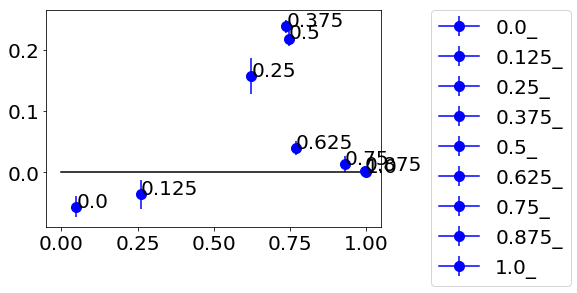

In [67]:
df_ne_edges_multi_OTN_res=plot_only_mean('ne_vs_nb_edges_multi_OTN', 'triads',df_multi_for_real, df_ne_edges_multi_OTN,'treshold')

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.105086,0.039789,0.048860,0.012237,-0.056226,0.016995
1,0.125_,0.296339,0.037580,0.261040,0.043595,-0.035299,0.023497
2,0.25_,0.466945,0.017379,0.623575,0.070231,0.156631,0.029536
3,0.375_,0.500999,0.001488,0.739031,0.026380,0.238033,0.010787
4,0.5_,0.528360,0.009060,0.746439,0.029416,0.218079,0.012566
5,0.625_,0.730502,0.026556,0.770299,0.007234,0.039798,0.011236
6,0.75_,0.918001,0.026707,0.931838,0.019268,0.013836,0.013445
7,0.875_,0.993247,0.006753,0.996296,0.003704,0.003050,0.003144


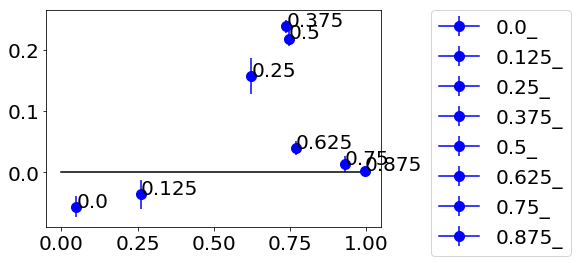

In [68]:
plot_only_mean_without_1('ne_vs_nb_edges_multi_OTN_without1', 'triads',df_multi_for_real, df_ne_edges_multi_OTN,'treshold')

In [69]:
df_ne_edges_multi_OTN_res

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.105086,0.039789,0.048860,0.012237,-0.056226,0.016995
1,0.125_,0.296339,0.037580,0.261040,0.043595,-0.035299,0.023497
2,0.25_,0.466945,0.017379,0.623575,0.070231,0.156631,0.029536
3,0.375_,0.500999,0.001488,0.739031,0.026380,0.238033,0.010787
4,0.5_,0.528360,0.009060,0.746439,0.029416,0.218079,0.012566
5,0.625_,0.730502,0.026556,0.770299,0.007234,0.039798,0.011236
6,0.75_,0.918001,0.026707,0.931838,0.019268,0.013836,0.013445
7,0.875_,0.993247,0.006753,0.996296,0.003704,0.003050,0.003144
8,1.0_,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [70]:
0.238033 /0.746439 

0.31889142984222424

In [71]:
b_ne_edges_opinion_single_means = binomial_for_n_larger_nb__mean('threshold',df_ne_edges_multi_OTN_res, df_multi_for_real)
wypisz_ladna_tabelke_w_latexu(b_ne_edges_opinion_single_means,"%.8f")

['0.0_', '0.125_', '0.25_', '0.375_', '0.5_', '0.625_', '0.75_', '0.875_', '1.0_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} & op/threshold &      binom \\
\midrule
0 &         0.0\_ & 0.99229044 \\
1 &       0.125\_ & 0.97611021 \\
2 &        0.25\_ & 0.00826026 \\
3 &       0.375\_ & 0.00000003 \\
4 &         0.5\_ & 0.00000012 \\
5 &       0.625\_ & 0.18480792 \\
6 &        0.75\_ & 0.19368329 \\
7 &       0.875\_ & 0.76085587 \\
8 &         1.0\_ & 1.00000000 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}


In [72]:
holmebonferoni_for_binom(b_ne_edges_opinion_single_means)

0.375_   2.704020119623097e-08   0.005555555555555556   mniejsze
0.5_   1.1697690592853126e-07   0.00625   mniejsze
0.25_   0.008260257645569641   0.0071428571428571435   wieksze
0.625_   0.1848079182057768   0.008333333333333333   wieksze
0.75_   0.19368328569557283   0.01   wieksze
0.875_   0.760855873616167   0.0125   wieksze
0.125_   0.9761102057802282   0.016666666666666666   wieksze
0.0_   0.9922904356508189   0.025   wieksze
1.0_   1.0   0.05   wieksze


In [73]:
df_ne_edges_multi_OTN_res

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.105086,0.039789,0.048860,0.012237,-0.056226,0.016995
1,0.125_,0.296339,0.037580,0.261040,0.043595,-0.035299,0.023497
2,0.25_,0.466945,0.017379,0.623575,0.070231,0.156631,0.029536
3,0.375_,0.500999,0.001488,0.739031,0.026380,0.238033,0.010787
4,0.5_,0.528360,0.009060,0.746439,0.029416,0.218079,0.012566
5,0.625_,0.730502,0.026556,0.770299,0.007234,0.039798,0.011236
6,0.75_,0.918001,0.026707,0.931838,0.019268,0.013836,0.013445
7,0.875_,0.993247,0.006753,0.996296,0.003704,0.003050,0.003144
8,1.0_,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [74]:
from platform import python_version

print(python_version())

3.6.5


In [75]:
b_edges_opinion_single_means = binomial_for_n_larger_nb__mean('topic',df_e_edges_OTN2_mean, df_edge_number_in_real)
print('\\begin{table}\n\caption{}\n'+b_edges_opinion_single_means.to_latex(float_format=lambda x: '%.3f' % x)+'\end{table}')

['premaritalsex_', 'euthanasia_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_']
\begin{table}
\caption{}
\begin{tabular}{llr}
\toprule
{} &    op/threshold &  binom \\
\midrule
0 &  premaritalsex\_ &  0.001 \\
1 &     euthanasia\_ &  0.952 \\
2 &       deathpen\_ &  0.758 \\
3 &    gaymarriage\_ &  0.154 \\
4 &      marijuana\_ &  0.006 \\
5 &      political\_ &  0.044 \\
6 &       abortion\_ &  0.273 \\
7 &     homosexual\_ &  0.005 \\
\bottomrule
\end{tabular}
\end{table}


In [76]:
df_multi_for_real[(df_multi_for_real['sems']==1) ]

,data,sems,op/threshold,divided_real,all_triad
0,2.0,1,0.0_,0.044444,45
7,4.0,1,0.125_,0.088889,45
14,18.0,1,0.25_,0.400000,45
21,32.0,1,0.375_,0.711111,45
28,34.0,1,0.5_,0.755556,45
35,34.0,1,0.625_,0.755556,45
42,44.0,1,0.75_,0.977778,45
49,44.0,1,0.875_,0.977778,45
56,45.0,1,1.0_,1.000000,45


In [77]:
df_multi_for_real[(df_multi_for_real['sems']==1) ]

,data,sems,op/threshold,divided_real,all_triad
0,2.0,1,0.0_,0.044444,45
7,4.0,1,0.125_,0.088889,45
14,18.0,1,0.25_,0.400000,45
21,32.0,1,0.375_,0.711111,45
28,34.0,1,0.5_,0.755556,45
35,34.0,1,0.625_,0.755556,45
42,44.0,1,0.75_,0.977778,45
49,44.0,1,0.875_,0.977778,45
56,45.0,1,1.0_,1.000000,45


# convolution

In [78]:
# pstwa_qrs_aggregated_over_sems=dict()
# for key, value in pstwa_qrs.items():
#     pstwa_qrs_aggregated_over_sems[key]=value[0]
    
# pstwa_distances_for_single_opinion=dict()
# for key, value in pstwa_qrs_aggregated_over_sems.items():
#     tmp=np.zeros(3)
#     tmp[0]=(value[0]**2)+(value[1]**2)+(value[2]**2)
#     tmp[1]=2*value[1]*(value[0]+value[2])
#     tmp[2]=2*value[2]*value[0]
#     pstwa_distances_for_single_opinion[key]=tmp

In [79]:
# pstwa_qrs_aggregated_over_sems_OTN=dict()
# for key, value in pstwa_qrs_OTN.items():
#     pstwa_qrs_aggregated_over_sems_OTN[key]=value[0]
    
pstwa_distances_for_single_opinion_OTN=dict()
for topic in settings.beliefs:
    pstwa_distances_for_single_opinion_OTN[topic]=np.zeros((7,3))

for key, value in pstwa_qrs_OTN.items():
    for sem in range(0,7):
        tmp=np.zeros(3)
        tmp[0]=(value[sem][0]**2)+(value[sem][1]**2)+(value[sem][2]**2)
        tmp[1]=2*value[sem][1]*(value[sem][0]+value[sem][2])
        tmp[2]=2*value[sem][2]*value[sem][0]
        pstwa_distances_for_single_opinion_OTN[key][sem]=tmp

In [80]:
def konwolucyjne_pstwa_per_sem(pstwa_distances_for_single_opinion):
    con_pe={}
    con_dg={}
    con_mp={}
    con_ah={}
    con_pedg={}
    con_mpah={}
    con_all={}
    
    for sem in range(0,7):
        con_pe[sem]= np.convolve(pstwa_distances_for_single_opinion['premaritalsex_'][sem],pstwa_distances_for_single_opinion['euthanasia_'][sem])
        con_dg[sem]= np.convolve(pstwa_distances_for_single_opinion['deathpen_'][sem],pstwa_distances_for_single_opinion['gaymarriage_'][sem])
        con_mp[sem]= np.convolve(pstwa_distances_for_single_opinion['marijuana_'][sem],pstwa_distances_for_single_opinion['political_'][sem])
        con_ah[sem]= np.convolve(pstwa_distances_for_single_opinion['abortion_'][sem],pstwa_distances_for_single_opinion['homosexual_'][sem])

        con_pedg[sem]=np.convolve(con_pe[sem],con_dg[sem])
        con_mpah[sem]=np.convolve(con_mp[sem], con_ah[sem])

        con_all[sem] = np.convolve(con_pedg[sem] , con_mpah[sem])
    distances=[x/16 for x in range(0,17)]

    distances_distr=np.zeros((7,len(distances),2))
    for sem in range(0,7):
        for x in range(len(distances)):
            distances_distr[sem][x][0]=distances[x]
            distances_distr[sem][x][1]=con_all[sem][x]

    progi = [x/8 for x in range(0,9)]
    distance_pstwa=dict() #np.zeros((len(progi),2)) #wlasciwie to dystrybuanta

    for sem in range(0,7):
        distance_pstwa[sem]={}
        for x in range(len(progi)):
             distance_pstwa[sem][progi[x]]=distances_distr[sem][distances_distr[sem][:,0]<=progi[x]].sum(0)[1]
    return (distances_distr, distance_pstwa)
  

In [81]:
# (distances_distr, distance_pstwa)=konwolucyjne_pstwa(pstwa_distances_for_single_opinion)
(distances_distr_OTN, distance_pstwa_OTN)=konwolucyjne_pstwa_per_sem(pstwa_distances_for_single_opinion_OTN)


In [82]:
konwolucyjne_pstwa_per_sem


<function __main__.konwolucyjne_pstwa_per_sem(pstwa_distances_for_single_opinion)>

In [83]:
distances_distr_OTN

array([[[0.00000000e+00, 8.98604671e-04],
        [6.25000000e-02, 4.39730239e-03],
        [1.25000000e-01, 1.49830839e-02],
        [1.87500000e-01, 3.55863235e-02],
        [2.50000000e-01, 6.85670598e-02],
        [3.12500000e-01, 1.06926007e-01],
        [3.75000000e-01, 1.41761036e-01],
        [4.37500000e-01, 1.58748745e-01],
        [5.00000000e-01, 1.53562103e-01],
        [5.62500000e-01, 1.26744752e-01],
        [6.25000000e-01, 9.02268023e-02],
        [6.87500000e-01, 5.41673190e-02],
        [7.50000000e-01, 2.74997061e-02],
        [8.12500000e-01, 1.12657272e-02],
        [8.75000000e-01, 3.69498690e-03],
        [9.37500000e-01, 8.42821186e-04],
        [1.00000000e+00, 1.27619670e-04]],

       [[0.00000000e+00, 6.95357521e-04],
        [6.25000000e-02, 3.73694248e-03],
        [1.25000000e-01, 1.32129899e-02],
        [1.87500000e-01, 3.27778201e-02],
        [2.50000000e-01, 6.48612780e-02],
        [3.12500000e-01, 1.03950250e-01],
        [3.75000000e-01, 1.40326

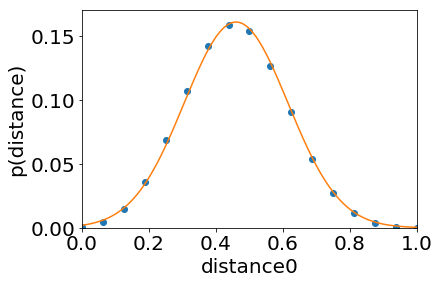

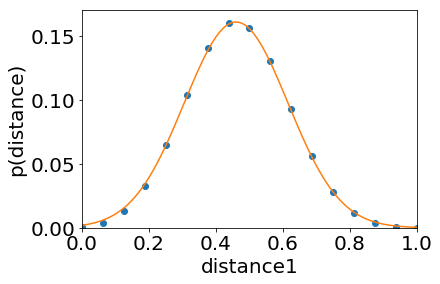

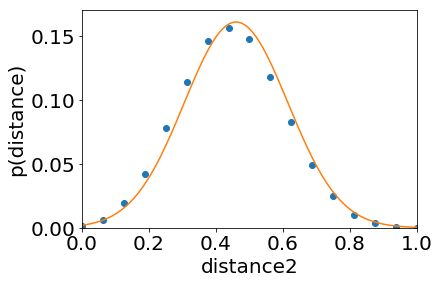

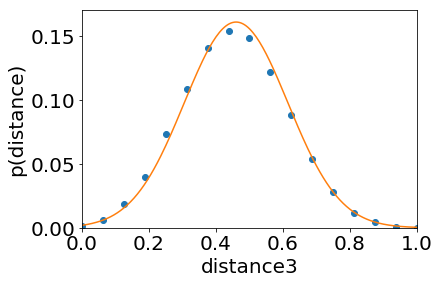

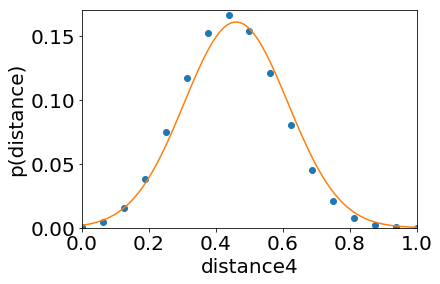

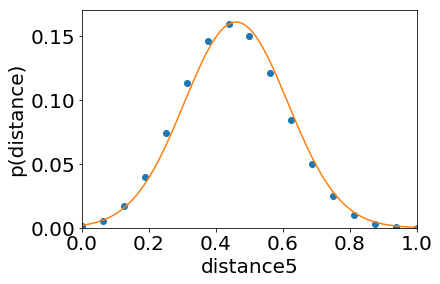

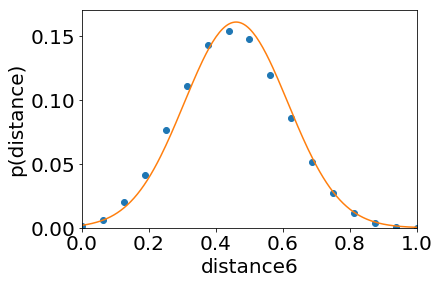

In [84]:
for sem in range(0,7):
    plt.figure()
    #fig = plt.figure(figsize=(6,4))
    plt.plot(distances_distr_OTN[sem][:,0],distances_distr_OTN[sem][:,1], 'o')
    x=[x/200 for x in range(0,201)]
    plt.plot(x, stats.norm.pdf(x, 0.46, 0.155)/16)
    #plt.plot(progi,distance_pstwa.values())
    plt.xlabel('distance'+str(sem))
    plt.ylabel('p(distance)')
    plt.xlim((0,1))
    plt.ylim((0,0.17))
    #plt.rcParams.update({'font.size': 20})
    #plt.savefig(settings.figure_folder+"p_dist_multi_OTN",dpi=600, bbox_inches='tight')
                #_plus_gauss",dpi=600)

In [85]:

weight={'premaritalsex_': 1,
 'euthanasia_': 1,
 'deathpen_': 1,
 'gaymarriage_':1,
 'marijuana_': 1,
 'political_': 1,
 'abortion_':1,
 'homosexual_':1}

ilosc_krawedzi_multi_OTN_all=policz_ilosc_krawedzi_multi_OTN()
#ilosc_krawedzi_multi_OTN=dict()
#for treshold in progi:
#    ilosc_krawedzi_multi_OTN[treshold]=ilosc_krawedzi_multi_OTN_all[treshold][0]
    
df_e_opinion_multi_OTN = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
df_e_opinion_multi_OTN = df_e_opinion_multi_OTN.fillna(0)    

#all_triads is all_edges in this case. It is for compabitlity
df_e_opinion_multi_OTN_in_real = pd.DataFrame(columns=['data','sems','op/threshold','divided_real','all_triad'])
df_e_opinion_multi_OTN_in_real = df_e_opinion_multi_OTN_in_real.fillna(0)

#ee_sum_opinion_multi=list()
#eb_sum_opinion_multi=list()
for treshold in progi:
    #ee_sum_opinion_multi.append(ilosc_krawedzi_multi[treshold].sum()*distance_pstwa[treshold])
    #eb_sum_opinion_multi.append(ilosc_krawedzi_multi[treshold][1])
    for sem in range(1,7):
        expected=ilosc_krawedzi_multi_OTN_all[treshold][sem].sum()*distance_pstwa_OTN[sem][treshold]
        real=ilosc_krawedzi_multi_OTN_all[treshold][sem][1]
        div_e=expected/ilosc_krawedzi_multi_OTN_all[treshold][sem].sum()
        div_r=real/ilosc_krawedzi_multi_OTN_all[treshold][sem].sum()
        df_e_opinion_multi_OTN = df_e_opinion_multi_OTN.append({'expected':expected,'data':float(real),
                                                      'sems':sem,'op/threshold':str(treshold)+"_",
                                                      'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
        df_e_opinion_multi_OTN_in_real = df_e_opinion_multi_OTN_in_real.append({'data':float(real),
                                                      'sems':sem,'op/threshold':str(treshold)+"_",
                                                      'divided_real':div_r,
                                                               'all_triad':ilosc_krawedzi_multi_OTN_all[treshold][sem].sum()}, ignore_index = True)
    expected=ilosc_krawedzi_multi_OTN_all[treshold][0].sum()*distance_pstwa_OTN[sem][treshold]
    real=ilosc_krawedzi_multi_OTN_all[treshold][0][1]
    div_e=expected/ilosc_krawedzi_multi_OTN_all[treshold][0].sum()
    div_r=real/ilosc_krawedzi_multi_OTN_all[treshold][0].sum()
    df_e_opinion_multi_OTN = df_e_opinion_multi_OTN.append({'expected':expected,'data':float(real),
                                                      'sems':'all','op/threshold':str(treshold)+"_",
                                                      'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
    df_e_opinion_multi_OTN_in_real = df_e_opinion_multi_OTN_in_real.append({'data':float(real),
                                                      'sems':'all','op/threshold':str(treshold)+"_",
                                                      'divided_real':div_r,
                                                               'all_triad':ilosc_krawedzi_multi_OTN_all[treshold][0].sum()}, ignore_index = True)



#plot_expected_vs_data_datafrme('ee_vs_eb_opinion_multi_OTN', 'e+', df_e_opinion_multi_OTN  )   

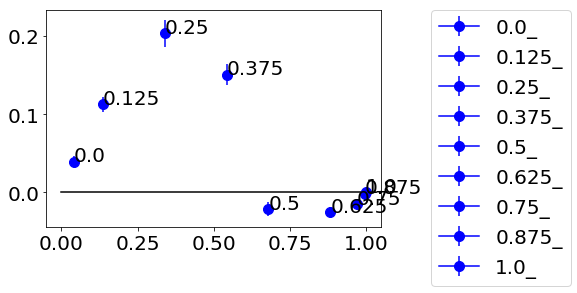

In [86]:
df_e_opinion_multi_mean = plot_only_mean('ee_vs_eb_opinion_multi_OTN', 'positive_edges',df_e_opinion_multi_OTN_in_real, df_e_opinion_multi_OTN,'treshold')

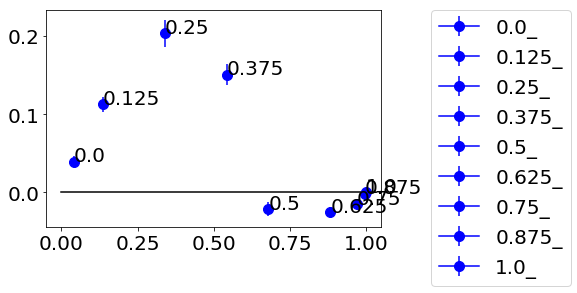

In [87]:
df_e_opinion_multi_mean = plot_only_mean('ee_vs_eb_opinion_multi_OTN', 'positive_edges',df_e_opinion_multi_OTN_in_real, df_e_opinion_multi_OTN,'treshold')

In [88]:
df_e_opinion_multi_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.001196,1.764604e-04,0.040751,0.016639,3.955499e-02,6.793069e-03
1,0.125_,0.023655,1.629332e-03,0.136507,0.022982,1.128519e-01,9.405849e-03
2,0.25_,0.136246,4.677827e-03,0.339828,0.042363,2.035820e-01,1.739975e-02
3,0.375_,0.392092,7.008289e-03,0.542934,0.032935,1.508414e-01,1.374668e-02
4,0.5_,0.700992,6.719662e-03,0.680054,0.021531,-2.093770e-02,9.208187e-03
5,0.625_,0.908852,3.795229e-03,0.883328,0.015044,-2.552462e-02,6.334152e-03
6,0.75_,0.985254,1.049787e-03,0.969900,0.010313,-1.535342e-02,4.232083e-03
7,0.875_,0.999091,1.042646e-04,0.997685,0.002315,-1.405826e-03,9.459773e-04
8,1.0_,1.000000,2.057161e-16,1.000000,0.000000,-2.220446e-16,8.398323e-17


In [89]:
df_e_opinion_multi_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.001196,1.764604e-04,0.040751,0.016639,3.955499e-02,6.793069e-03
1,0.125_,0.023655,1.629332e-03,0.136507,0.022982,1.128519e-01,9.405849e-03
2,0.25_,0.136246,4.677827e-03,0.339828,0.042363,2.035820e-01,1.739975e-02
3,0.375_,0.392092,7.008289e-03,0.542934,0.032935,1.508414e-01,1.374668e-02
4,0.5_,0.700992,6.719662e-03,0.680054,0.021531,-2.093770e-02,9.208187e-03
5,0.625_,0.908852,3.795229e-03,0.883328,0.015044,-2.552462e-02,6.334152e-03
6,0.75_,0.985254,1.049787e-03,0.969900,0.010313,-1.535342e-02,4.232083e-03
7,0.875_,0.999091,1.042646e-04,0.997685,0.002315,-1.405826e-03,9.459773e-04
8,1.0_,1.000000,2.057161e-16,1.000000,0.000000,-2.220446e-16,8.398323e-17


In [90]:
#b_edges_opinion_multi_means = binomial_for_n_larger_nb__mean('threshold',df_e_opinion_multi_mean, df_e_opinion_multi_OTN_in_real)
#print('\\begin{table}\n\caption{}\n'+b_edges_opinion_multi_means.to_latex( float_format="%%.2f")+'\end{table}')

In [91]:
#b_edges_opinion_multi_means

In [92]:
  
def number_of_balanced_triads_from_qrs_multi(distance_pstwa_OTN_tu):   
    pstw_balance_opinion_multi_OTN=dict()
    weight={'premaritalsex_': 1,
     'euthanasia_': 1,
     'deathpen_': 1,
     'gaymarriage_':1,
     'marijuana_': 1,
     'political_': 1,
     'abortion_':1,
     'homosexual_':1}

    for sem in range(0,7):
        pstw_balance_opinion_multi_OTN[sem]=dict()
        for treshold in progi:
            pstw_balance_opinion_multi_OTN[sem][treshold]=(distance_pstwa_OTN_tu[sem][treshold]**3)+(3
                                *distance_pstwa_OTN_tu[sem][treshold]*((1-distance_pstwa_OTN_tu[sem][treshold])**2))

    df_n_opinion_multi_OTN = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
    df_n_opinion_multi_OTN = df_n_opinion_multi_OTN.fillna(0)    


    for treshold in progi:
        triads=heider_bib.multi_triangles_lifetime(communication_time_graphs,treshold,[2,3,4,5,6],
                                                       weight, heider_bib.MultiSignOfEdge_weight_ordered,
                                                      heider_bib.Mulit_info_of_triangle)[0]
        for sem in range(1,7):

            expected=(triads != 0).sum()[sem]*pstw_balance_opinion_multi_OTN[sem][treshold]
            real=(triads == 1).sum()[sem]
            div_e=expected/(triads != 0).sum()[sem]
            df_n_opinion_multi_OTN = df_n_opinion_multi_OTN.append({'expected':expected,'data':float(real),
                                                          'sems':sem,'op/threshold':str(treshold)+"_",
                                                          'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)
        expected=(triads != 0).sum().sum()*pstw_balance_opinion_multi_OTN[0][treshold]
        real=(triads == 1).sum().sum()
        div_e=expected/(triads != 0).sum().sum()
        df_n_opinion_multi_OTN = df_n_opinion_multi_OTN.append({'expected':expected,'data':float(real),
                                                          'sems':'all','op/threshold':str(treshold)+"_",
                                                          'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)

    return df_n_opinion_multi_OTN


df_n_opinion_multi_OTN=number_of_balanced_triads_from_qrs_multi(distance_pstwa_OTN)


#plot_expected_vs_data_datafrme('ne_vs_nb_opinion_multi_OTN', 'n', df_n_opinion_multi_OTN  )


In [93]:
#plot_only_mean('ne_vs_nb_opinion_multi_OTN', 'triads',df_multi_for_real, df_n_opinion_multi_OTN,'treshold')

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.003577,5.269419e-04,0.048860,0.012237,4.528330e-02,5.000279e-03
1,0.125_,0.067586,4.453588e-03,0.261040,0.043595,1.934543e-01,1.789003e-02
2,0.25_,0.306994,7.660671e-03,0.623575,0.070231,3.165811e-01,2.884172e-02
3,0.375_,0.494636,1.190707e-03,0.739031,0.026380,2.443951e-01,1.078067e-02
4,0.5_,0.533019,3.209720e-03,0.746439,0.029416,2.134196e-01,1.208031e-02
5,0.625_,0.773730,7.711265e-03,0.770299,0.007234,-3.431250e-03,4.316435e-03
6,0.75_,0.957086,2.978760e-03,0.931838,0.019268,-2.524807e-02,7.959704e-03
7,0.875_,0.997278,3.117666e-04,0.996296,0.003704,-9.820181e-04,1.517378e-03
8,1.0_,1.000000,5.722407e-16,1.000000,0.000000,-2.220446e-16,2.336163e-16


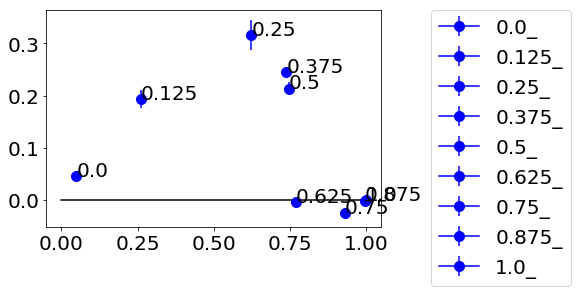

In [94]:
plot_only_mean('ne_vs_nb_opinion_multi_OTN', 'triads',df_multi_for_real, df_n_opinion_multi_OTN,'treshold')

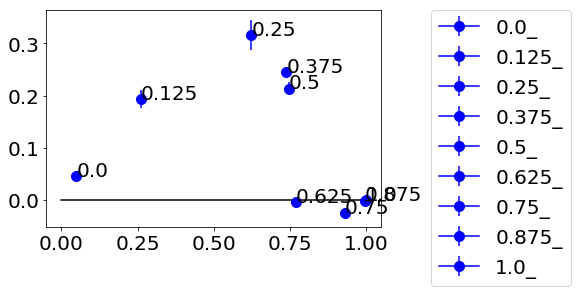

In [95]:
df_n_opinion_multi_OTN_mean = plot_only_mean('ne_vs_nb_opinion_multi_OTN', 'triads',df_multi_for_real, df_n_opinion_multi_OTN,'treshold')

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.003577,0.000527,0.048860,0.012237,0.045283,0.005000
1,0.125_,0.067586,0.004454,0.261040,0.043595,0.193454,0.017890
2,0.25_,0.306994,0.007661,0.623575,0.070231,0.316581,0.028842
3,0.375_,0.494636,0.001191,0.739031,0.026380,0.244395,0.010781
4,0.5_,0.533019,0.003210,0.746439,0.029416,0.213420,0.012080
5,0.625_,0.773730,0.007711,0.770299,0.007234,-0.003431,0.004316
6,0.75_,0.957086,0.002979,0.931838,0.019268,-0.025248,0.007960
7,0.875_,0.997278,0.000312,0.996296,0.003704,-0.000982,0.001517


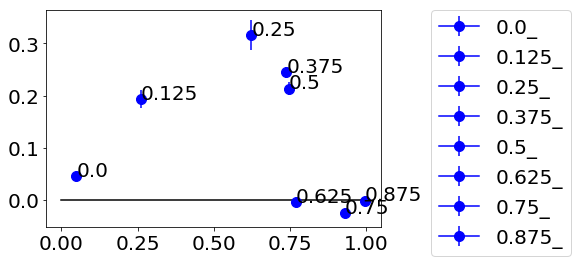

In [96]:
plot_only_mean_without_1('ne_vs_nb_opinion_multi_OTN_without_1', 'triads',df_multi_for_real, df_n_opinion_multi_OTN,'treshold')

In [97]:
df_n_opinion_multi_OTN_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.003577,5.269419e-04,0.048860,0.012237,4.528330e-02,5.000279e-03
1,0.125_,0.067586,4.453588e-03,0.261040,0.043595,1.934543e-01,1.789003e-02
2,0.25_,0.306994,7.660671e-03,0.623575,0.070231,3.165811e-01,2.884172e-02
3,0.375_,0.494636,1.190707e-03,0.739031,0.026380,2.443951e-01,1.078067e-02
4,0.5_,0.533019,3.209720e-03,0.746439,0.029416,2.134196e-01,1.208031e-02
5,0.625_,0.773730,7.711265e-03,0.770299,0.007234,-3.431250e-03,4.316435e-03
6,0.75_,0.957086,2.978760e-03,0.931838,0.019268,-2.524807e-02,7.959704e-03
7,0.875_,0.997278,3.117666e-04,0.996296,0.003704,-9.820181e-04,1.517378e-03
8,1.0_,1.000000,5.722407e-16,1.000000,0.000000,-2.220446e-16,2.336163e-16


In [98]:
3.165811e-01 / 0.623575 

0.5076872870143928

In [99]:
b_triads_opinion_multi_means = binomial_for_n_larger_nb__mean('threshold',df_n_opinion_multi_OTN_mean, df_multi_for_real)
#print(b_triads_opinion_multi_means)
wypisz_ladna_tabelke_w_latexu(b_triads_opinion_multi_means, "%.10f")

['0.0_', '0.125_', '0.25_', '0.375_', '0.5_', '0.625_', '0.75_', '0.875_', '1.0_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} & op/threshold &        binom \\
\midrule
0 &         0.0\_ & 0.0000008064 \\
1 &       0.125\_ & 0.0000000027 \\
2 &        0.25\_ & 0.0000000001 \\
3 &       0.375\_ & 0.0000000117 \\
4 &         0.5\_ & 0.0000002063 \\
5 &       0.625\_ & 0.6089305872 \\
6 &        0.75\_ & 0.8597906218 \\
7 &       0.875\_ & 0.9450899653 \\
8 &         1.0\_ & 1.0000000000 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}


In [100]:
holmebonferoni_for_binom(b_triads_opinion_multi_means)

0.25_   1.0047326703813165e-10   0.005555555555555556   mniejsze
0.125_   2.6840390327029783e-09   0.00625   mniejsze
0.375_   1.1725649140468934e-08   0.0071428571428571435   mniejsze
0.5_   2.063450788435611e-07   0.008333333333333333   mniejsze
0.0_   8.063580058604179e-07   0.01   mniejsze
0.625_   0.6089305872009594   0.0125   wieksze
0.75_   0.8597906217855935   0.016666666666666666   wieksze
0.875_   0.9450899652939317   0.025   wieksze
1.0_   1.0   0.05   wieksze


In [101]:
8.063580058604179e-07  *10**7

8.06358005860418

In [102]:
b_triads_opinion_multi_means

,op/threshold,binom
0,0.0_,8.063580e-07
1,0.125_,2.684039e-09
2,0.25_,1.004733e-10
3,0.375_,1.172565e-08
4,0.5_,2.063451e-07
5,0.625_,6.089306e-01
6,0.75_,8.597906e-01
7,0.875_,9.450900e-01
8,1.0_,1.000000e+00


In [103]:
df_n_opinion_multi_OTN_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.003577,5.269419e-04,0.048860,0.012237,4.528330e-02,5.000279e-03
1,0.125_,0.067586,4.453588e-03,0.261040,0.043595,1.934543e-01,1.789003e-02
2,0.25_,0.306994,7.660671e-03,0.623575,0.070231,3.165811e-01,2.884172e-02
3,0.375_,0.494636,1.190707e-03,0.739031,0.026380,2.443951e-01,1.078067e-02
4,0.5_,0.533019,3.209720e-03,0.746439,0.029416,2.134196e-01,1.208031e-02
5,0.625_,0.773730,7.711265e-03,0.770299,0.007234,-3.431250e-03,4.316435e-03
6,0.75_,0.957086,2.978760e-03,0.931838,0.019268,-2.524807e-02,7.959704e-03
7,0.875_,0.997278,3.117666e-04,0.996296,0.003704,-9.820181e-04,1.517378e-03
8,1.0_,1.000000,5.722407e-16,1.000000,0.000000,-2.220446e-16,2.336163e-16


# Bernoulli

In [104]:
#stats.binom.pmf(1,2, 0.9)



In [105]:
#0.9*0.1*2


In [106]:
#df_n_opinion_multi_OTN

In [107]:
#pstw_balance_opinion_multi_OTN[sem][treshold]

In [108]:
#df_multi_for_real

In [109]:
treshold

1.0

# Convolution v2.0

ustalenie stanu pierwszego węzła

In [110]:
sA=[0,0]

prawdopodobieństwa q,r,s

In [111]:
#pstwa_qrs_OTN

pstwa dystansow dla poszczegolnych opinii

In [112]:
#pstwa_distances_for_single_opinion_OTN

# Losowanie wektorów

zmienic mapowanie

In [113]:
def randomize_vectors(nodes):
    mapping=dict()
    lista_wezlow=list(nodes)
    randomizowana_lista=random.sample(lista_wezlow, len(lista_wezlow))
    for i in range(len(nodes)):
        mapping[lista_wezlow[i]]=randomizowana_lista[i]
    return mapping

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.041088,0.014679,0.048860,0.012237,0.007772,0.007802
1,0.125_,0.225689,0.038493,0.261040,0.043595,0.035350,0.023742
2,0.25_,0.535784,0.041473,0.623575,0.070231,0.087791,0.033298
3,0.375_,0.757117,0.026381,0.739031,0.026380,-0.018085,0.015231
4,0.5_,0.751751,0.025659,0.746439,0.029416,-0.005312,0.015936
5,0.625_,0.712404,0.011056,0.770299,0.007234,0.057895,0.005394
6,0.75_,0.817125,0.018814,0.931838,0.019268,0.114712,0.010994
7,0.875_,0.971621,0.004851,0.996296,0.003704,0.024675,0.002492


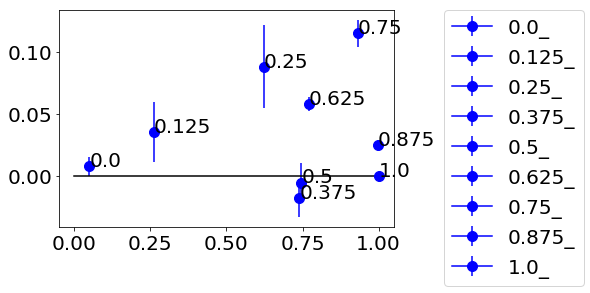

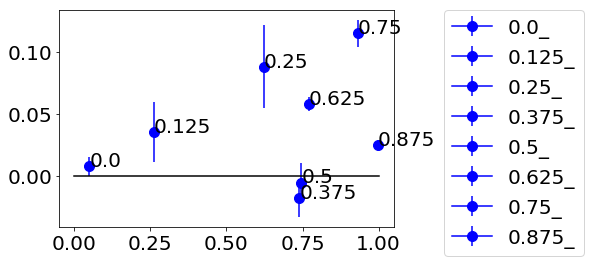

In [211]:
for name_tu in range(1):
    
    powtorzen=100
    
    pstwa_global=dict()
    for powtorzenia in range(powtorzen):
        pstwa_global[powtorzenia]=dict()
        for threshold in progi:
                tmp=np.zeros((7,1))
                for sem in range(0,7):
                    tmp[sem]=0
                pstwa_global[powtorzenia][threshold]=tmp
    
    for powtorzenia in range(powtorzen):
        number_triad_tmp=dict()
        for threshold in progi:
            number_triad_tmp[threshold]=dict()
            for sem in range(0,7):
                number_triad_tmp[threshold][sem]=[0,0]
            

        for threshold in progi:
                for sem  in range(1,7):
                    nodes_in_triads=set()
                    triads_in_sem=net_func.find_triangles(communication_time_graphs[sem], 'x')
                    for tr in triads_in_sem:
                        for node in tr:
                            nodes_in_triads.add(node)
                    mapping_id_to_rand_id=randomize_vectors(nodes_in_triads)

                    for tr in triads_in_sem:
                        s1=heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],
                                                                                      mapping_id_to_rand_id[tr[0]],
                                                                                        mapping_id_to_rand_id[tr[1]], threshold,weight)
                        s2=heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],
                                                                                      mapping_id_to_rand_id[tr[1]],
                                                                                        mapping_id_to_rand_id[tr[2]], threshold,weight)
                        s3=heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],
                                                                                      mapping_id_to_rand_id[tr[2]],
                                                                                        mapping_id_to_rand_id[tr[0]], threshold,weight)
                        sign=s1*s2*s3
                        number_triad_tmp[threshold][sem][rzutowanie_na_01(sign)]+=1
                        number_triad_tmp[threshold][0][rzutowanie_na_01(sign)]+=1

        pstwa_random_vectors=dict()
        for threshold in progi:
            tmp=np.zeros((7,1))
            for sem in range(0,7):
                number_of_triads=number_triad_tmp[threshold][sem][0]+number_triad_tmp[threshold][sem][1]
                tmp[sem]=number_triad_tmp[threshold][sem][1]/number_of_triads
            pstwa_random_vectors[threshold]=tmp
            
        pstwa_global[powtorzenia]=pstwa_random_vectors
        
    pstwa_random_vectors_global=dict()
    for threshold in progi:
            tmp=np.zeros((7,1))
            for sem in range(0,7):
                tmp[sem]=0
            pstwa_random_vectors_global[threshold]=tmp
    for i in range(len(pstwa_global)):
        for threshold in progi:
            for sem in range(7):
                pstwa_random_vectors_global[threshold][sem]+=pstwa_global[i][threshold][sem]

    for threshold in progi:
        for sem in range(7):
            pstwa_random_vectors_global[threshold][sem]/=len(pstwa_global)


        

    df_ne_vectors = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
    df_ne_vectors = df_ne_vectors.fillna(0)

    df_multi_for_real = pd.DataFrame(columns=['data','sems','op/threshold','divided_real','all_triad'])
    df_multi_for_real = df_multi_for_real.fillna(0)

    for treshold in progi:
        triads=heider_bib.multi_triangles_lifetime(communication_time_graphs,treshold,[2,3,4,5,6],
                                                       weight, heider_bib.MultiSignOfEdge_weight_ordered,
                                                      heider_bib.Mulit_info_of_triangle)[0]
        for sem in range(1,7):
            expected=(triads != 0).sum()[sem]*pstwa_random_vectors_global[treshold][sem][0]
            real=(triads == 1).sum()[sem] 
            div_e=expected/(triads != 0).sum()[sem]
            div_r=real/(triads != 0).sum()[sem]
            df_ne_vectors= df_ne_vectors.append({'expected':expected,
                                                              'data':float(real),'sems':sem,
                                                              'op/threshold':str(treshold)+"_",'data-exp':real-expected,
                                                                     'divided_expected':div_e},
                                                                                 ignore_index = True)
            df_multi_for_real= df_multi_for_real.append({'data':float(real),'sems':sem,
                                                              'op/threshold':str(treshold)+"_",
                                                                     'divided_real':div_r,'all_triad':(triads != 0).sum()[sem]},
                                                                                 ignore_index = True)
        expected=(triads != 0).sum().sum()*pstwa_random_vectors_global[treshold][0][0]
        real=(triads == 1).sum().sum()
        div_e=expected/(triads != 0).sum()[sem]
        div_r=real/(triads != 0).sum()[sem]
        df_ne_vectors = df_ne_vectors.append({'expected':expected,'data':float(real),
                                                          'sems':'all','op/threshold':str(treshold)+"_",
                                                          'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)

        df_multi_for_real = df_multi_for_real.append({'data':float(real),
                                                          'sems':'all','op/threshold':str(treshold)+"_",
                                                          'divided_real':div_r,'all_triad':(triads != 0).sum().sum()}, ignore_index = True)

df_ne_vectors_means=plot_only_mean('ne_vs_nb_vectors_withotu1_'+'powtorzen'+str(powtorzen)+"_"+str(name_tu), 'triads',df_multi_for_real, df_ne_vectors,'treshold')
plot_only_mean_without_1('ne_vs_nb_vectors_withotu1_'+'powtorzen'+str(powtorzen)+"_"+str(name_tu), 'triads',df_multi_for_real, df_ne_vectors,'treshold')


In [197]:
df_n_opinion_multi_OTN_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.003577,5.269419e-04,0.048860,0.012237,4.528330e-02,5.000279e-03
1,0.125_,0.067586,4.453588e-03,0.261040,0.043595,1.934543e-01,1.789003e-02
2,0.25_,0.306994,7.660671e-03,0.623575,0.070231,3.165811e-01,2.884172e-02
3,0.375_,0.494636,1.190707e-03,0.739031,0.026380,2.443951e-01,1.078067e-02
4,0.5_,0.533019,3.209720e-03,0.746439,0.029416,2.134196e-01,1.208031e-02
5,0.625_,0.773730,7.711265e-03,0.770299,0.007234,-3.431250e-03,4.316435e-03
6,0.75_,0.957086,2.978760e-03,0.931838,0.019268,-2.524807e-02,7.959704e-03
7,0.875_,0.997278,3.117666e-04,0.996296,0.003704,-9.820181e-04,1.517378e-03
8,1.0_,1.000000,5.722407e-16,1.000000,0.000000,-2.220446e-16,2.336163e-16


In [194]:
df_ne_vectors_means

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.000222,0.000147,0.048860,0.012237,0.048638,0.004996
1,0.125_,0.002399,0.000494,0.261040,0.043595,0.258641,0.017799
2,0.25_,0.006255,0.000463,0.623575,0.070231,0.617321,0.028672
3,0.375_,0.007640,0.000356,0.739031,0.026380,0.731392,0.010771
4,0.5_,0.007991,0.000363,0.746439,0.029416,0.738448,0.012010
5,0.625_,0.007447,0.000770,0.770299,0.007234,0.762852,0.002970
6,0.75_,0.007904,0.000656,0.931838,0.019268,0.923934,0.007871
7,0.875_,0.009261,0.000377,0.996296,0.003704,0.987036,0.001520


In [198]:
b_triads_random_vector_means = binomial_for_n_larger_nb__mean('threshold',df_ne_vectors_means, df_multi_for_real)
#print(b_triads_opinion_multi_means)
wypisz_ladna_tabelke_w_latexu(b_triads_random_vector_means, "%.10f")

['0.0_', '0.125_', '0.25_', '0.375_', '0.5_', '0.625_', '0.75_', '0.875_', '1.0_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} & op/threshold &        binom \\
\midrule
0 &         0.0\_ & 0.0000000000 \\
1 &       0.125\_ & 0.0000000000 \\
2 &        0.25\_ & 0.0000000000 \\
3 &       0.375\_ & 0.0000000000 \\
4 &         0.5\_ & 0.0000000000 \\
5 &       0.625\_ & 0.0000000000 \\
6 &        0.75\_ & 0.0000000000 \\
7 &       0.875\_ & 0.0000000000 \\
8 &         1.0\_ & 0.0000000000 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}


In [199]:
holmebonferoni_for_binom(b_triads_random_vector_means)

1.0_   1.0000000000000217e-276   0.005555555555555556   mniejsze
0.875_   6.288471835786348e-274   0.00625   mniejsze
0.75_   2.8887001539196817e-262   0.0071428571428571435   mniejsze
0.625_   6.290157035824362e-200   0.008333333333333333   mniejsze
0.5_   7.214726884888211e-188   0.01   mniejsze
0.375_   1.6120849510430892e-179   0.0125   mniejsze
0.25_   3.388110819653026e-143   0.016666666666666666   mniejsze
0.125_   2.629887996303581e-50   0.025   mniejsze
0.0_   5.850830550897839e-17   0.05   mniejsze


In [200]:
b_triads_random_vector_means.loc[0:7]

,op/threshold,binom
0,0.0_,5.850831e-17
1,0.125_,2.629888e-50
2,0.25_,3.388111e-143
3,0.375_,1.612085e-179
4,0.5_,7.214727e-188
5,0.625_,6.290157e-200
6,0.75_,2.888700e-262
7,0.875_,6.288472e-274


In [201]:
holmebonferoni_for_binom(b_triads_random_vector_means.loc[0:7])

0.875_   6.288471835786348e-274   0.00625   mniejsze
0.75_   2.8887001539196817e-262   0.0071428571428571435   mniejsze
0.625_   6.290157035824362e-200   0.008333333333333333   mniejsze
0.5_   7.214726884888211e-188   0.01   mniejsze
0.375_   1.6120849510430892e-179   0.0125   mniejsze
0.25_   3.388110819653026e-143   0.016666666666666666   mniejsze
0.125_   2.629887996303581e-50   0.025   mniejsze
0.0_   5.850830550897839e-17   0.05   mniejsze


,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.135402,0.025666,0.048860,0.012237,-0.086542,0.011608
1,0.125_,0.295028,0.040029,0.261040,0.043595,-0.033988,0.024162
2,0.25_,0.583437,0.045795,0.623575,0.070231,0.040138,0.034229
3,0.375_,0.770007,0.030008,0.739031,0.026380,-0.030976,0.016311
4,0.5_,0.770234,0.027538,0.746439,0.029416,-0.023796,0.016450
5,0.625_,0.732478,0.006627,0.770299,0.007234,0.037821,0.004005
6,0.75_,0.835044,0.014071,0.931838,0.019268,0.096793,0.009741
7,0.875_,0.975131,0.005064,0.996296,0.003704,0.021165,0.002561


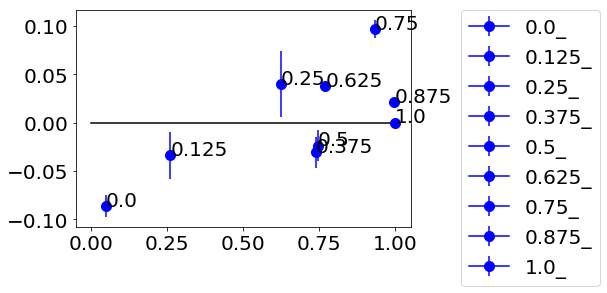

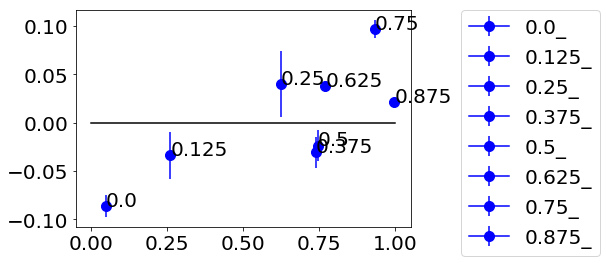

In [202]:
pstw_balance_random_from_vector=dict()
weight={'premaritalsex_': 1,
     'euthanasia_': 1,
     'deathpen_': 1,
     'gaymarriage_':1,
     'marijuana_': 1,
     'political_': 1,
     'abortion_':1,
     'homosexual_':1}

powtorzen=100
    
pstwa_global=dict()
    
for powtorzenia in range(powtorzen):
    number_triad_tmp=dict()
    for threshold in progi:
        number_triad_tmp[threshold]=dict()
        for sem in range(0,7):
            number_triad_tmp[threshold][sem]=[0,0]    
   
    for threshold in progi:
        for sem in range(1,7):
            nodes_in_triads=set()
            triads=net_func.find_triangles(communication_time_graphs[sem], 'x')
            for tr in triads:
                for i in range(0,3):
                    nodes_in_triads.add(tr[i])
            nodes=list(nodes_in_triads)
            for tr in triads:
                n1=random.choice(nodes)
                n2=random.choice(nodes)
                n3=random.choice(nodes)
                s1=heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],n1,n2, threshold,weight)
                s2=heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],n2,n3, threshold,weight)
                s3=heider_bib.MultiSignOfEdge_weight_ordered.multi_sign_of_edge(communication_time_graphs[sem],n3,n1, threshold,weight)
                balance=s1*s2*s3
                number_triad_tmp[threshold][sem][rzutowanie_na_01(balance)]+=1
                number_triad_tmp[threshold][0][rzutowanie_na_01(balance)]+=1
                


    pstwa_random_vectors_losowanie=dict()
    for threshold in progi:
            tmp=np.zeros((7,1))
            for sem in range(0,7):
                number_of_triads=number_triad_tmp[threshold][sem][0]+number_triad_tmp[threshold][sem][1]
                tmp[sem]=number_triad_tmp[threshold][sem][1]/number_of_triads
            pstwa_random_vectors_losowanie[threshold]=tmp
 
    pstwa_global[powtorzenia]=pstwa_random_vectors_losowanie
        
pstwa_random_vectors_losowanie_global=dict()
for threshold in progi:
            tmp=np.zeros((7,1))
            for sem in range(0,7):
                tmp[sem]=0
            pstwa_random_vectors_losowanie_global[threshold]=tmp
for i in range(len(pstwa_global)):
        for threshold in progi:
            for sem in range(7):
                pstwa_random_vectors_losowanie_global[threshold][sem]+=pstwa_global[i][threshold][sem]

for threshold in progi:
        for sem in range(7):
            pstwa_random_vectors_losowanie_global[threshold][sem]/=len(pstwa_global)




                
                
df_ne_vectors_losowanie = pd.DataFrame(columns=['expected','data','sems','op/threshold','data-exp','divided_expected'])
df_ne_vectors_losowanie = df_ne_vectors_losowanie.fillna(0)

df_multi_for_real = pd.DataFrame(columns=['data','sems','op/threshold','divided_real','all_triad'])
df_multi_for_real = df_multi_for_real.fillna(0)

for treshold in progi:
        triads=heider_bib.multi_triangles_lifetime(communication_time_graphs,treshold,[2,3,4,5,6],
                                                       weight, heider_bib.MultiSignOfEdge_weight_ordered,
                                                      heider_bib.Mulit_info_of_triangle)[0]
        for sem in range(1,7):
            expected=(triads != 0).sum()[sem]*pstwa_random_vectors_losowanie_global[treshold][sem][0]
            real=(triads == 1).sum()[sem] 
            div_e=expected/(triads != 0).sum()[sem]
            div_r=real/(triads != 0).sum()[sem]
            df_ne_vectors_losowanie= df_ne_vectors_losowanie.append({'expected':expected,
                                                              'data':float(real),'sems':sem,
                                                              'op/threshold':str(treshold)+"_",'data-exp':real-expected,
                                                                     'divided_expected':div_e},
                                                                                 ignore_index = True)
            df_multi_for_real= df_multi_for_real.append({'data':float(real),'sems':sem,
                                                              'op/threshold':str(treshold)+"_",
                                                                     'divided_real':div_r,'all_triad':(triads != 0).sum()[sem]},
                                                                                 ignore_index = True)
        expected=(triads != 0).sum().sum()*pstwa_random_vectors_losowanie_global[treshold][0][0]
        real=(triads == 1).sum().sum()
        div_e=expected/(triads != 0).sum()[sem]
        div_r=real/(triads != 0).sum()[sem]
        df_ne_vectors_losowanie = df_ne_vectors_losowanie.append({'expected':expected,'data':float(real),
                                                          'sems':'all','op/threshold':str(treshold)+"_",
                                                          'data-exp':real-expected,'divided_expected':div_e}, ignore_index = True)

        df_multi_for_real = df_multi_for_real.append({'data':float(real),
                                                          'sems':'all','op/threshold':str(treshold)+"_",
                                                          'divided_real':div_r,'all_triad':(triads != 0).sum().sum()}, ignore_index = True)


df_ne_vectors_losowanie_mean=plot_only_mean('ne_vs_nb_new_vectors_withotu1_'+'powtorzen'+str(powtorzen)+"_"+str(name_tu), 'triads',df_multi_for_real, df_ne_vectors_losowanie,'treshold')
plot_only_mean_without_1('ne_vs_nb_new_vectors_withotu1_'+'powtorzen'+str(powtorzen)+"_"+str(name_tu), 'triads',df_multi_for_real, df_ne_vectors_losowanie,'treshold')

In [191]:
df_ne_vectors_losowanie_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.133088,0.022619,0.048860,0.012237,-0.084228,0.010499
1,0.125_,0.298850,0.040572,0.261040,0.043595,-0.037810,0.024313
2,0.25_,0.580150,0.044304,0.623575,0.070231,0.043425,0.033900
3,0.375_,0.777657,0.032759,0.739031,0.026380,-0.038625,0.017171
4,0.5_,0.766006,0.025703,0.746439,0.029416,-0.019567,0.015947
5,0.625_,0.740724,0.008469,0.770299,0.007234,0.029575,0.004547
6,0.75_,0.833953,0.015732,0.931838,0.019268,0.097885,0.010155
7,0.875_,0.975105,0.004497,0.996296,0.003704,0.021192,0.002378


In [203]:
b_triads_random_vector_losowanie_means = binomial_for_n_larger_nb__mean('threshold',df_ne_vectors_losowanie_mean, df_multi_for_real)
#print(b_triads_opinion_multi_means)
wypisz_ladna_tabelke_w_latexu(b_triads_random_vector_losowanie_means, "%.10f")
holmebonferoni_for_binom(b_triads_opinion_multi_means)
b_triads_opinion_multi_means.loc[0:7]
holmebonferoni_for_binom(b_triads_opinion_multi_means.loc[0:7])

['0.0_', '0.125_', '0.25_', '0.375_', '0.5_', '0.625_', '0.75_', '0.875_', '1.0_']
\begin{table}
\begin{tabular}{llr}
\toprule
{} & op/threshold &        binom \\
\midrule
0 &         0.0\_ & 0.9996684411 \\
1 &       0.125\_ & 0.9741990811 \\
2 &        0.25\_ & 0.6375316119 \\
3 &       0.375\_ & 0.8769613500 \\
4 &         0.5\_ & 0.7807915270 \\
5 &       0.625\_ & 0.1989429862 \\
6 &        0.75\_ & 0.0001366977 \\
7 &       0.875\_ & 0.1398868194 \\
8 &         1.0\_ & 1.0000000000 \\
\bottomrule
\end{tabular}
\caption{}
\end{table}
0.25_   1.0047326703813165e-10   0.005555555555555556   mniejsze
0.125_   2.6840390327029783e-09   0.00625   mniejsze
0.375_   1.1725649140468934e-08   0.0071428571428571435   mniejsze
0.5_   2.063450788435611e-07   0.008333333333333333   mniejsze
0.0_   8.063580058604179e-07   0.01   mniejsze
0.625_   0.6089305872009594   0.0125   wieksze
0.75_   0.8597906217855935   0.016666666666666666   wieksze
0.875_   0.9450899652939317   0.025   wieksze
1.0_   

In [204]:
df_ne_vectors_losowanie_mean

,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.135402,0.025666,0.048860,0.012237,-0.086542,0.011608
1,0.125_,0.295028,0.040029,0.261040,0.043595,-0.033988,0.024162
2,0.25_,0.583437,0.045795,0.623575,0.070231,0.040138,0.034229
3,0.375_,0.770007,0.030008,0.739031,0.026380,-0.030976,0.016311
4,0.5_,0.770234,0.027538,0.746439,0.029416,-0.023796,0.016450
5,0.625_,0.732478,0.006627,0.770299,0.007234,0.037821,0.004005
6,0.75_,0.835044,0.014071,0.931838,0.019268,0.096793,0.009741
7,0.875_,0.975131,0.005064,0.996296,0.003704,0.021165,0.002561
8,1.0_,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


,op/threshold,divided_expected,de_std,divided_real,dr_std,div_r-div_e,dr-de_std
0,0.0_,0.135402,0.025666,0.048860,0.012237,-0.086542,0.011608
1,0.125_,0.295028,0.040029,0.261040,0.043595,-0.033988,0.024162
2,0.25_,0.583437,0.045795,0.623575,0.070231,0.040138,0.034229
3,0.375_,0.770007,0.030008,0.739031,0.026380,-0.030976,0.016311
4,0.5_,0.770234,0.027538,0.746439,0.029416,-0.023796,0.016450
5,0.625_,0.732478,0.006627,0.770299,0.007234,0.037821,0.004005
6,0.75_,0.835044,0.014071,0.931838,0.019268,0.096793,0.009741
7,0.875_,0.975131,0.005064,0.996296,0.003704,0.021165,0.002561


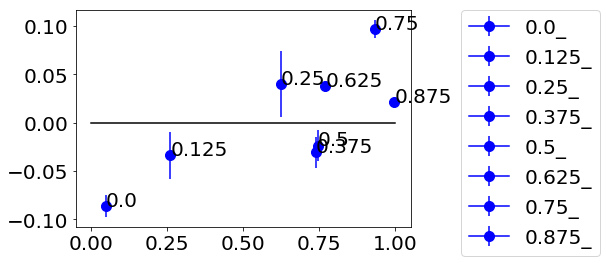

In [205]:
plot_only_mean_without_1('ne_vs_nb_vectors_withotu1_'+'powtorzen'+str(powtorzen)+"_"+str(name_tu), 'triads',df_multi_for_real, df_ne_vectors_losowanie,'treshold')

In [163]:
df_ne_vectors_losowanie

,expected,data,sems,op/threshold,data-exp,divided_expected
0,9.0,7.0,all,0.0_,-2.0,0.750000
1,31.0,31.0,all,0.125_,0.0,2.583333
2,73.0,79.0,all,0.25_,6.0,6.083333
3,103.0,101.0,all,0.375_,-2.0,8.583333
4,104.0,103.0,all,0.5_,-1.0,8.666667
5,97.0,106.0,all,0.625_,9.0,8.083333
6,121.0,130.0,all,0.75_,9.0,10.083333
7,137.0,137.0,all,0.875_,0.0,11.416667
8,138.0,138.0,all,1.0_,0.0,11.500000


In [164]:
df_ne_vectors

,expected,data,sems,op/threshold,data-exp,divided_expected
0,0.071429,2.0,1,0.0_,1.928571,0.001587
1,0.028571,2.0,2,0.0_,1.971429,0.001099
2,0.028571,0.0,3,0.0_,-0.028571,0.003175
3,0.000000,1.0,4,0.0_,1.000000,0.000000
4,0.057143,1.0,5,0.0_,0.942857,0.002857
5,0.157143,1.0,6,0.0_,0.842857,0.013095
6,0.342857,7.0,all,0.0_,6.657143,0.028571
7,0.557143,4.0,1,0.125_,3.442857,0.012381
8,0.685714,7.0,2,0.125_,6.314286,0.026374
9,0.171429,2.0,3,0.125_,1.828571,0.019048
